<a href="https://colab.research.google.com/github/HazelvdW/context-framed-listening/blob/main/framed_listening_TFIDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Framed Listening: **TF-IDF analyses**
> By **Hazel A. van der Walle** (PhD student, Music, Durham University), September 2025.

This notebook analyses semantic similarity between music-evoked thought (MET)
descriptions at the aggregated document level to answer: "Can extramusical context cues influence music-evoked thoughts (METs)?"

Analysis approach:
- Works with aggregated documents (called "METdocs") ONLY
  - TF-IDF is a bag-of-words method optimised for document-level analysis with
    sufficient word overlap. Individual short texts (10-50 words) produce extremely
    sparse vectors with minimal lexical overlap, resulting in artificially low
    similarity values that do not reflect semantic relationships.
  - BERT and Word2Vec handle individual-level analysis as they capture semantic
    meaning beyond exact word matches.
- Aggregates all thoughts from each clip-context pair into documents (N=64)
- Calculates pairwise cosine similarities between METdocs
- Categorises document pairs by their stimuli conditions to compare similarity distributions
- Tests whether aggregated thoughts are more similar when sharing music vs sharing context

Key comparisons:
1. Same clip + different context VS Different clip + same context
   → Does music or context drive thought similarity at the document level?
2. Within vs between genre/context/clip conditions
   → What factors influence semantic coherence in aggregated METs?

Note: This document-level analysis complements the individual-level analyses
conducted with BERT and Word2Vec, providing a lexical perspective on semantic patterns.

---

All datasets generated and used for this study are openly available on GitHub https://github.com/HazelvdW/context-framed-listening.

In [1]:
!rm -r context-framed-listening
# Clone the GitHub repository
!git clone https://github.com/HazelvdW/context-framed-listening.git

Cloning into 'context-framed-listening'...
remote: Enumerating objects: 745, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 745 (delta 2), reused 1 (delta 1), pack-reused 733 (from 1)
Receiving objects: 100% (745/745), 248.46 MiB | 17.86 MiB/s, done.
Resolving deltas: 100% (335/335), done.


Refresh files to see **"context-framed-listening"**.


---

## Setup & Imports

In [2]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import matplotlib.pyplot as plt
import seaborn as sns

# Import comprehensive utilities function file
!cp /content/context-framed-listening/analysis_utils.py .
import analysis_utils as utils

# Setup paths
OUTPUT_DIR = '/content/context-framed-listening/NLP_outputs/TFIDF'

---
## ANALYSIS AT COMBINED METdoc LEVEL

TF-IDF (Term Frequency-Inverse Document Frequency) is a bag-of-words approach
that weights words by their importance within documents relative to a corpus.
This method is optimized for document-level analysis where texts are long enough
to contain sufficient word overlap for meaningful similarity comparisons.

Analysis structure:
- Aggregates all thoughts from each clip-context pair into documents (N=64)
- Each METdoc represents the collective semantic profile of one experimental condition
- Compares documents using cosine similarity of TF-IDF vectors
- Uses identical condition categories as BERT and Word2Vec for cross-method comparison

Purpose: Examine lexical similarity patterns at the aggregated level
- Shows which condition pairs share similar vocabulary and word usage patterns
- Complements semantic similarity analyses from BERT and Word2Vec
- Useful for understanding document-level semantic profiles


Load in the data file "**METdocsLVL2.csv**" that contains the preprocessed text data of participants' thought desciptions grouped into "METdocs", generated using the code notebook titled [framed_listening_text_prep](https://github.com/HazelvdW/context-framed-listening/blob/main/framed_listening_text_prep.ipynb)

In [3]:
# Load TF-IDF-appropriate aggregated METdocs
print("Loading aggregated METdocs...")
METdocs = pd.read_csv('/content/context-framed-listening/NLP_outputs/METdocsLVL2.csv')
text_column = 'METdescr_prepLVL2'

print(f"Total METdocs (clip-context pairs): {len(METdocs)}")
print(f"Unique clips: {METdocs['clip_name'].nunique()}")
print(f"Unique contexts: {METdocs['context_word'].nunique()}")
print(f"Unique genres: {METdocs['genre_code'].nunique()}")

Loading aggregated METdocs...
Total METdocs (clip-context pairs): 64
Unique clips: 16
Unique contexts: 4
Unique genres: 4


### TF-IDF Vectorisation

In [4]:
print("\nComputing TF-IDF vectors...")

# Initialise TF-IDF vectorizer
tfidf_vectorizer_docs = TfidfVectorizer(sublinear_tf=False)
# Fit and transform METdocs
tfidf_matrix_docs = tfidf_vectorizer_docs.fit_transform(METdocs[text_column].astype(str))

print(f"TF-IDF matrix shape: {tfidf_matrix_docs.shape}")
print(f"Number of unique terms: {len(tfidf_vectorizer_docs.get_feature_names_out())}")

# Save TF-IDF scores
df_TFIDF_docs = pd.DataFrame(
    tfidf_matrix_docs.toarray(),
    columns=tfidf_vectorizer_docs.get_feature_names_out(),
    index=METdocs['ClipContext_pair']
)
df_TFIDF_docs.to_csv(f'{OUTPUT_DIR}/TFIDF_scores.csv', encoding='utf-8')


Computing TF-IDF vectors...
TF-IDF matrix shape: (64, 3295)
Number of unique terms: 3295


### Cosine Similarity Matrix


Calculating cosine similarity matrix...


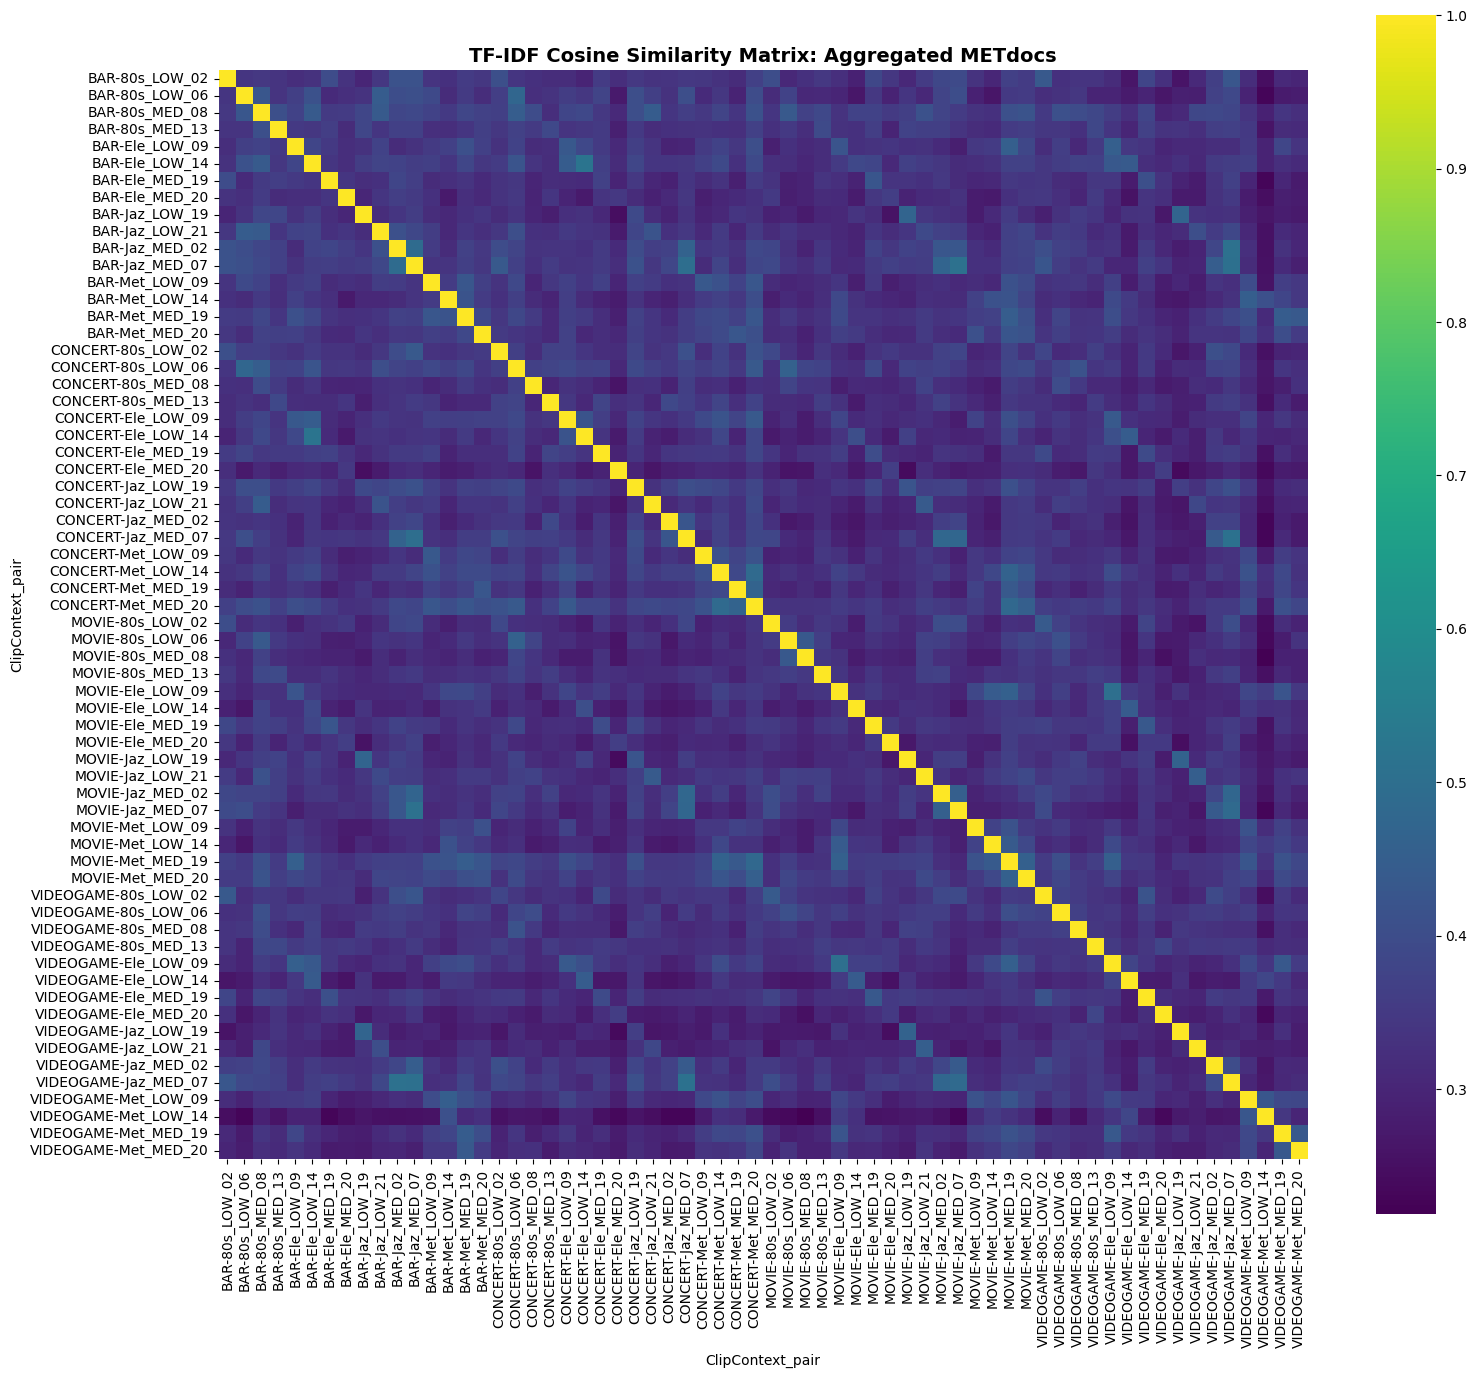

In [5]:
print("\nCalculating cosine similarity matrix...")
cosineMatrix_TFIDF = cosine_similarity(tfidf_matrix_docs, tfidf_matrix_docs)

# Create labeled DataFrame and save
cosineMatrix_TFIDF_df = pd.DataFrame(
    cosineMatrix_TFIDF,
    index=METdocs['ClipContext_pair'],
    columns=METdocs['ClipContext_pair']
)
cosineMatrix_TFIDF_df.to_csv(f'{OUTPUT_DIR}/TFIDF_cosineMatrix.csv', encoding='utf-8')

# Heatmap visualization
plt.figure(figsize=(16, 14))
sns.heatmap(cosineMatrix_TFIDF_df, cmap='viridis', annot=False, square=True)
plt.title('TF-IDF Cosine Similarity Matrix: Aggregated METdocs', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/TFIDF_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

### Word Clouds by Genre x Context


WORD CLOUDS BY GENRE × CONTEXT

GENERATING GENRE × CONTEXT WORD CLOUDS (TF-IDF)
  Generated 4/16 word clouds...
  Generated 8/16 word clouds...
  Generated 12/16 word clouds...
  Generated 16/16 word clouds...


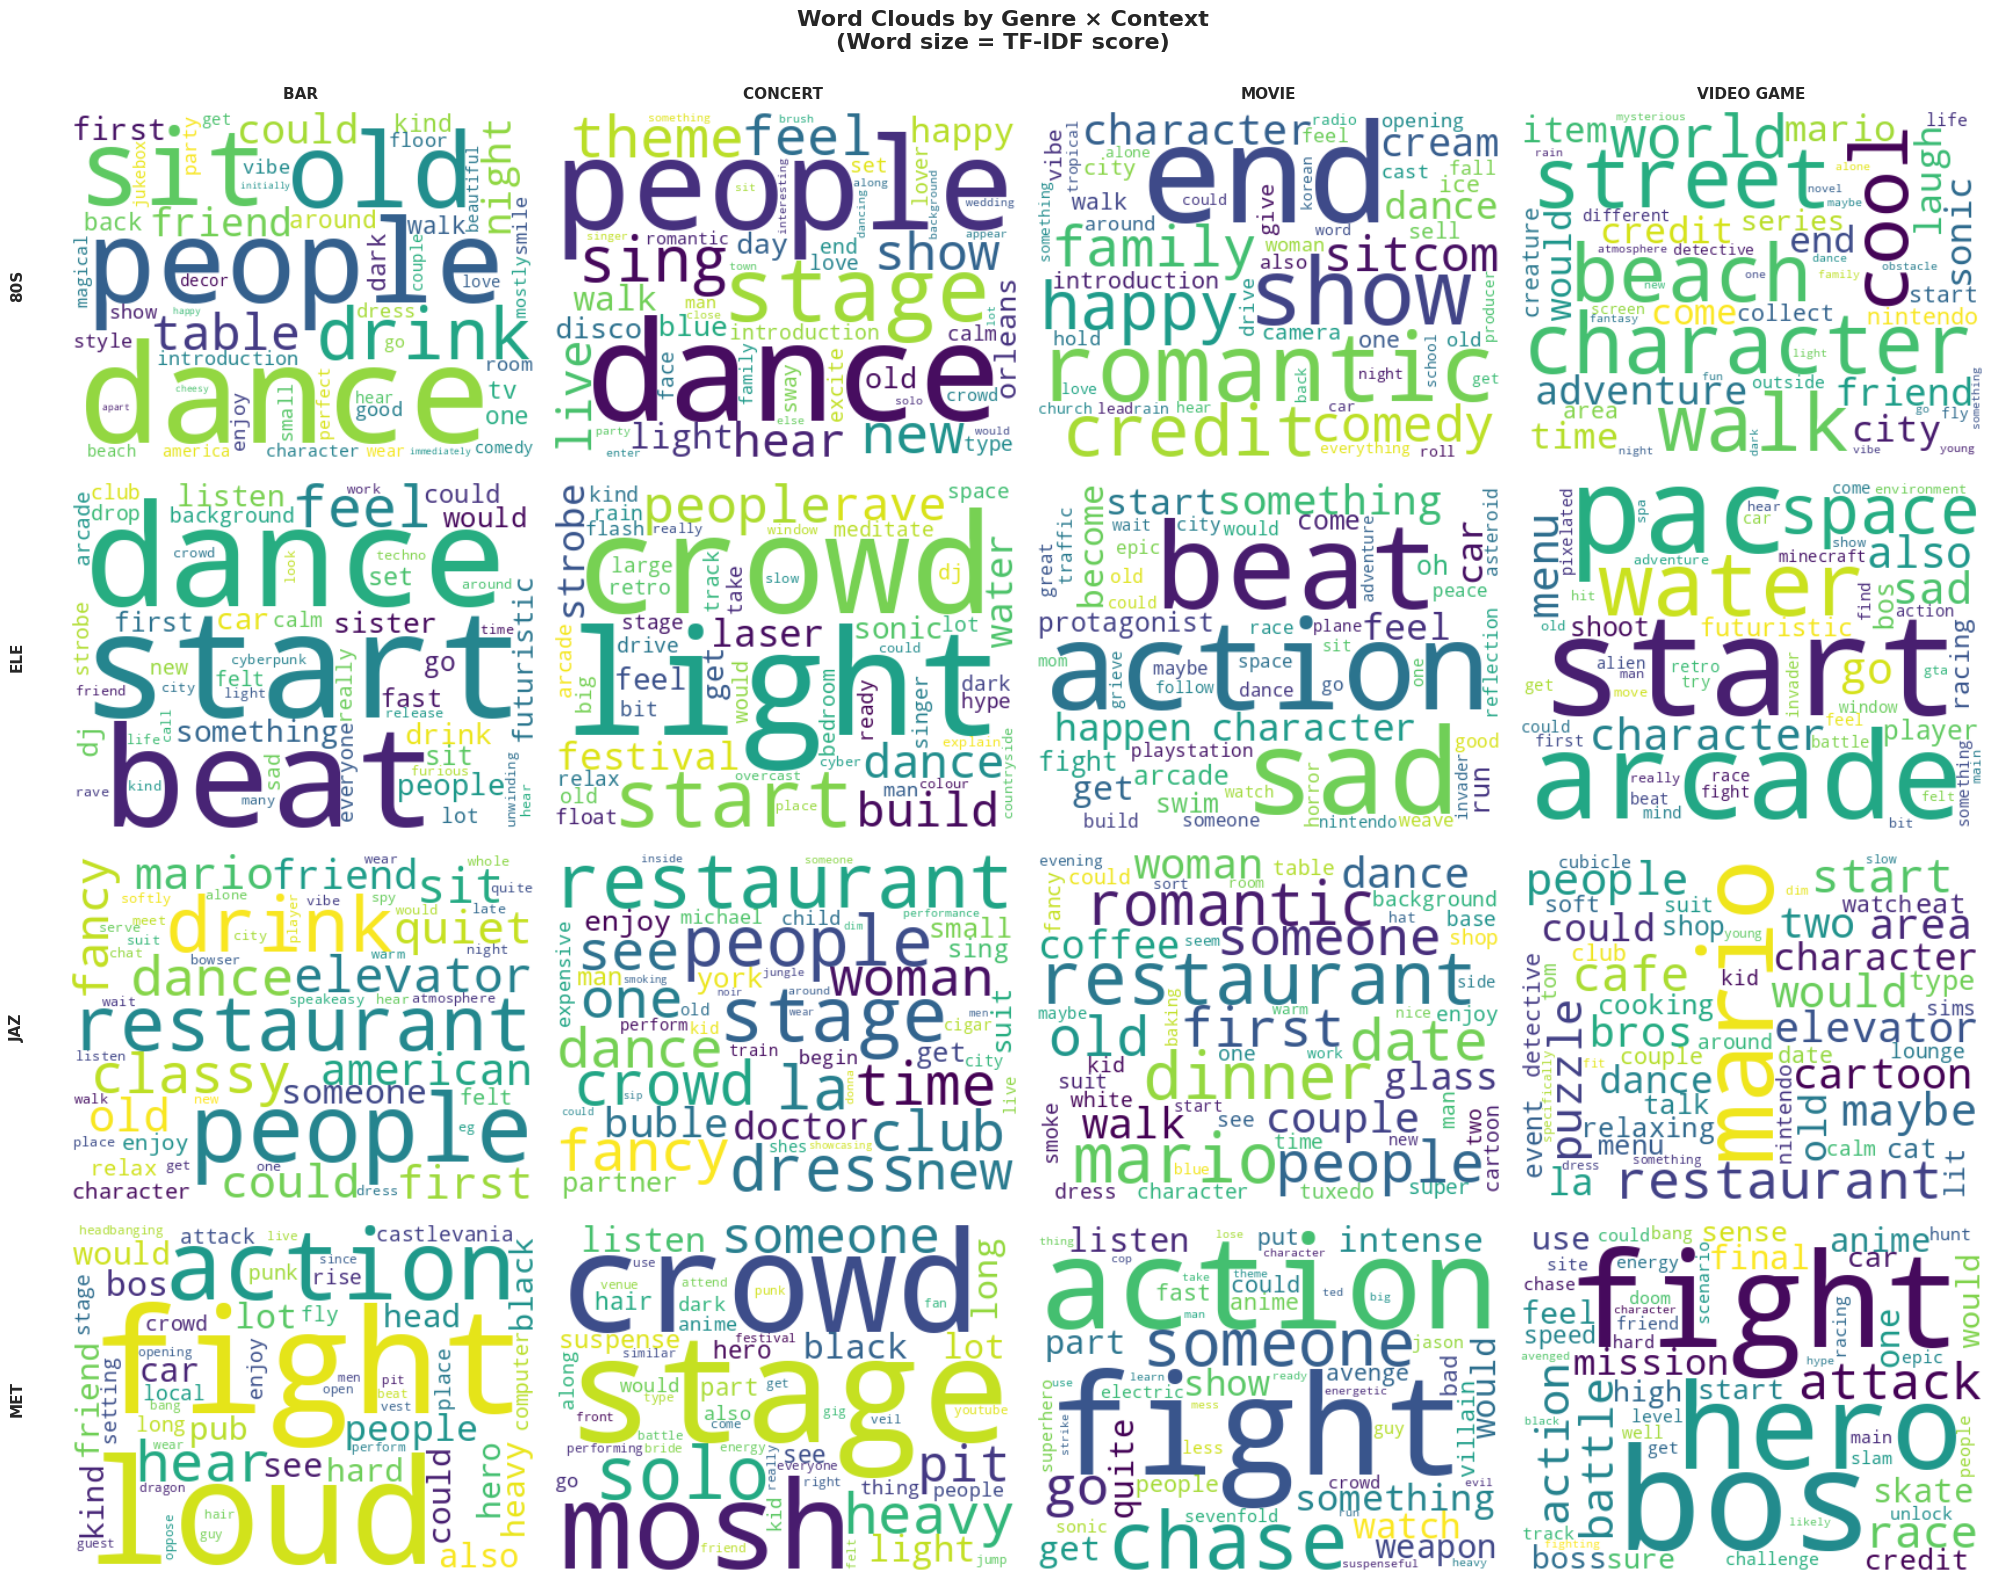


✓ Saved word clouds to: /content/context-framed-listening/NLP_outputs/TFIDF/TFIDF_genre_context_wordclouds.png


In [16]:
print("\n" + "="*70)
print("WORD CLOUDS BY GENRE × CONTEXT")
print("="*70)

wordcloud_fig = utils.create_genre_context_wordclouds(
    tfidf_scores_df=df_TFIDF_docs,
    metadata=METdocs,
    output_dir=OUTPUT_DIR,
    model_prefix='TFIDF',
    top_n_words=50,
    verbose=True
)

### Extract Similarity Values by Condition

In [7]:
print("\nExtracting similarity values by condition...")

sim_df_docs = utils.extract_similarity_by_condition(
    cosineMatrix_TFIDF,
    METdocs,
    verbose=True
)

# Save with summary
utils.save_similarity_by_condition(
    sim_df_docs,
    f'{OUTPUT_DIR}/TFIDF_similarity_by_condition.csv',
    verbose=True
)


Extracting similarity values by condition...
Extracting similarity by condition from 64 items...
Total unique pairs to process: 2016

✓ Extracted 2016 unique pairs

Condition distribution:
condition
diff_clip_diff_context_diff_genre    1152
diff_clip_diff_context_same_genre     288
diff_clip_same_context                480
same_clip_diff_context                 96
Name: count, dtype: int64

✓ Saved similarity data to: /content/context-framed-listening/NLP_outputs/TFIDF/TFIDF_similarity_by_condition.csv

Condition summary:
                                   count      mean       std       min  \
condition                                                                
diff_clip_diff_context_diff_genre   1152  0.323328  0.034219  0.218276   
diff_clip_diff_context_same_genre    288  0.345951  0.045896  0.254255   
diff_clip_same_context               480  0.340497  0.040032  0.233578   
same_clip_diff_context                96  0.403728  0.046392  0.318897   

                          

### Binary Comparisons (Same vs Different for each factor)
Testing whether sharing a factor (clip/context/genre) increases similarity
1. CLIP EFFECT: Same vs Different
2. CONTEXT EFFECT: Same vs Different
3. GENRE EFFECT: Same vs Different
4. KEY COMPARISON: Which factor matters most?




BINARY COMPARISONS

BINARY COMPARISONS

Same Clip vs Different Clip:
  Same: M=0.4037 (N=96)
  Diff: M=0.3310 (N=1920)
  t=15.095, p=0.0000 ***, d=1.700

Same Genre vs Different Genre:
  Same: M=0.3601 (N=480)
  Diff: M=0.3265 (N=1536)
  t=13.377, p=0.0000 ***, d=0.763

Same Context vs Different Context:
  Same: M=0.3405 (N=480)
  Diff: M=0.3326 (N=1536)
  t=3.716, p=0.0002 ***, d=0.191

----------------------------------------------------------------------
RANKING BY EFFECT SIZE:
----------------------------------------------------------------------
  1. Clip: d = +1.700 ***
  2. Genre: d = +0.763 ***
  3. Context: d = +0.191 ***
✓ Saved: /content/context-framed-listening/NLP_outputs/TFIDF/TFIDF_binary_comparisons.png


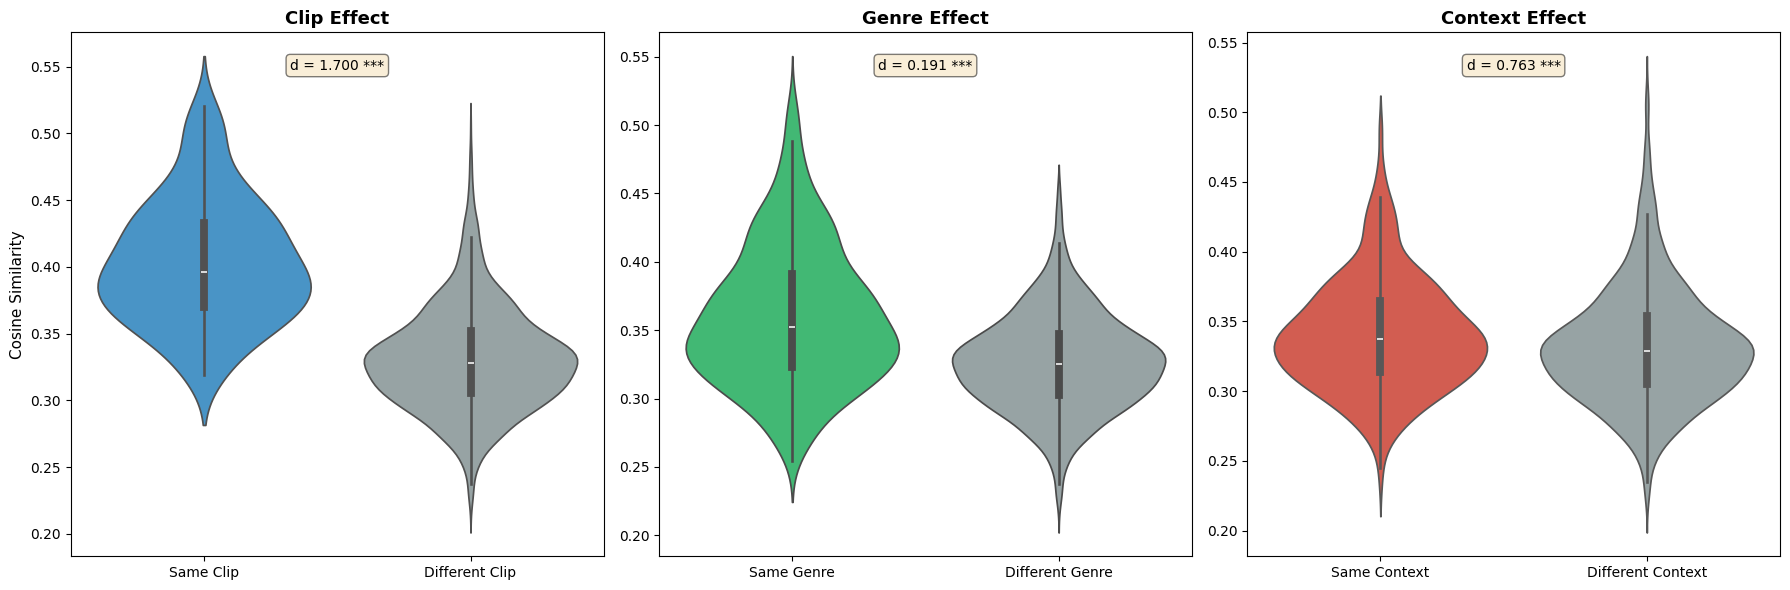

In [8]:
print("\n" + "="*70)
print("BINARY COMPARISONS")
print("="*70)

binary_results = utils.binary_comparisons(sim_df_docs, verbose=True)

# Rank by effect size
print("\n" + "-"*70)
print("RANKING BY EFFECT SIZE:")
print("-"*70)
sorted_results = sorted(binary_results, key=lambda x: abs(x['d']), reverse=True)
for i, result in enumerate(sorted_results, 1):
    factor = result['comparison'].split()[1]
    print(f"  {i}. {factor}: d = {result['d']:+.3f} {result['sig']}")

# Create visualization
fig = utils.create_binary_comparisons_figure(
    sim_df_docs, binary_results)
utils.save_figure(fig, f'{OUTPUT_DIR}/TFIDF_binary_comparisons.png')


### Isolated Clip v Context Comparison

In [9]:
print("\n" + "="*70)
print("Isolated Clip vs. Context Comparison")
print("="*70)

primary_comparison = utils.compare_conditions(
    sim_df_docs,
    'same_clip_diff_context',
    'diff_clip_same_context',
    'Same Clip, Different Context',
    'Different Clip, Same Context'
)

print(f"\nClip-driven: M={primary_comparison['mean1']:.4f} (N={primary_comparison['n1']})")
print(f"Context-driven: M={primary_comparison['mean2']:.4f} (N={primary_comparison['n2']})")
print(f"Difference: {primary_comparison['diff']:.4f}")
print(f"t = {primary_comparison['t']:.3f}, p = {primary_comparison['p']:.4f} {primary_comparison['sig']}")
print(f"Cohen's d = {primary_comparison['d']:.3f}")

if primary_comparison['mean1'] > primary_comparison['mean2']:
    print("\n→ CLIP drives similarity MORE than context")
else:
    print("\n→ CONTEXT drives similarity MORE than clip")


Isolated Clip vs. Context Comparison

Clip-driven: M=0.4037 (N=96)
Context-driven: M=0.3405 (N=480)
Difference: 0.0632
t = 12.459, p = 0.0000 ***
Cohen's d = 1.459

→ CLIP drives similarity MORE than context


### Context- & Genre-Specific Analses

In [10]:
# --------- CONTEXT ---------
print("\n" + "="*70)
print("CONTEXT-SPECIFIC ANALYSIS")
print("="*70)

(within_context_df,
 context_pairs_df,
 context_moderator_df,
 context_consistency_df,
 context_consistency_comp_df) = utils.run_factor_analysis(
    sim_df=sim_df_docs,
    metadata=METdocs,
    factor_column='context_word',
    factor_name='Context',
    output_dir=OUTPUT_DIR,
    model_prefix='TFIDF',
    verbose=True
)

print(f"\n✓ Context analysis complete!")
print(f"  - {len(within_context_df)} contexts analyzed")
print(f"  - {len(context_pairs_df)} pairwise comparisons")
print(f"  - {len(context_moderator_df)} clip vs context comparisons")

# --------- GENRE ---------
print("\n" + "="*70)
print("GENRE-SPECIFIC ANALYSIS")
print("="*70)

(within_genre_df,
 genre_pairs_df,
 genre_moderator_df,
 genre_consistency_df,
 genre_consistency_comp_df) = utils.run_factor_analysis(
    sim_df=sim_df_docs,
    metadata=METdocs,
    factor_column='genre_code',
    factor_name='Genre',
    output_dir=OUTPUT_DIR,
    model_prefix='TFIDF',
    verbose=True
)

print(f"\n✓ Genre analysis complete!")
print(f"  - {len(within_genre_df)} genres analyzed")
print(f"  - {len(genre_pairs_df)} pairwise comparisons")
print(f"  - {len(genre_moderator_df)} clip vs context comparisons")


# --------- genre x context interaction ---------
genre_context_df = utils.analyze_genre_context_interaction(
    sim_df=sim_df_docs,
    metadata=METdocs,
    output_dir=OUTPUT_DIR,
    model_prefix='TFIDF',
    verbose=True
)

# --------- consistency comparison ---------
utils.print_consistency_comparison_summary(
    genre_consistency_df,
    context_consistency_df
)


CONTEXT-SPECIFIC ANALYSIS

SPECIFIC CONTEXT ANALYSIS
Testing whether specific contexts produce distinctive thought patterns


1. WITHIN-CONTEXT SIMILARITY
----------------------------------------------------------------------
When different clip is heard with the same context, how similar are thoughts?

BAR :
  Mean similarity: 0.3543
  SD: 0.0354
  CV: 0.0999
  N pairs: 120

CONCERT :
  Mean similarity: 0.3486
  SD: 0.0413
  CV: 0.1186
  N pairs: 120

MOVIE:
  Mean similarity: 0.3345
  SD: 0.0392
  CV: 0.1172
  N pairs: 120

VIDEO GAME:
  Mean similarity: 0.3246
  SD: 0.0374
  CV: 0.1153
  N pairs: 120

----------------------------------------------------------------------
RANKING: Contexts by Thought Convergence
----------------------------------------------------------------------
  1. BAR : M=0.3543 (CV=0.0999)
  2. CONCERT : M=0.3486 (CV=0.1186)
  3. MOVIE: M=0.3345 (CV=0.1172)
  4. VIDEO GAME: M=0.3246 (CV=0.1153)

→ BAR  produces MOST similar thoughts
→ VIDEO GAME produces MOST

### Within- vs Between-Factor Analyses


WITHIN VS. BETWEEN FACTOR SIMILARITY

--- GENRE ANALYSIS ---

WITHIN VS. BETWEEN GENRE SIMILARITY ANALYSIS

OVERALL COMPARISON:
  Within-Genre: M=0.3601, SD=0.0513 (N=480)
  Between-Genre: M=0.3265, SD=0.0352 (N=1536)
  Difference: 0.0336
  Welch's t(2014) = 13.377, p = 0.0000 ***
  Cohen's d = 0.763

INDIVIDUAL GENRE COMPARISONS:

80S vs Between:
  Within-80s: M=0.3530, SD=0.0363 (N=120)
  Between: M=0.3265, SD=0.0352 (N=1536)
  t = 7.698, p = 0.0000 ***, d = 0.740

ELE vs Between:
  Within-Ele: M=0.3400, SD=0.0507 (N=120)
  Between: M=0.3265, SD=0.0352 (N=1536)
  t = 2.858, p = 0.0050 **, d = 0.309

JAZ vs Between:
  Within-Jaz: M=0.3657, SD=0.0620 (N=120)
  Between: M=0.3265, SD=0.0352 (N=1536)
  t = 6.821, p = 0.0000 ***, d = 0.776

MET vs Between:
  Within-Met: M=0.3816, SD=0.0432 (N=120)
  Between: M=0.3265, SD=0.0352 (N=1536)
  t = 13.579, p = 0.0000 ***, d = 1.395

✓ Saved results to: /content/context-framed-listening/NLP_outputs/TFIDF/TFIDF_genre_within_vs_between.csv


/content/analysis_utils.py:1137: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=plot_df, x='category', y='similarity',
/content/analysis_utils.py:1146: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(categories, rotation=45, ha='right', fontsize=10)


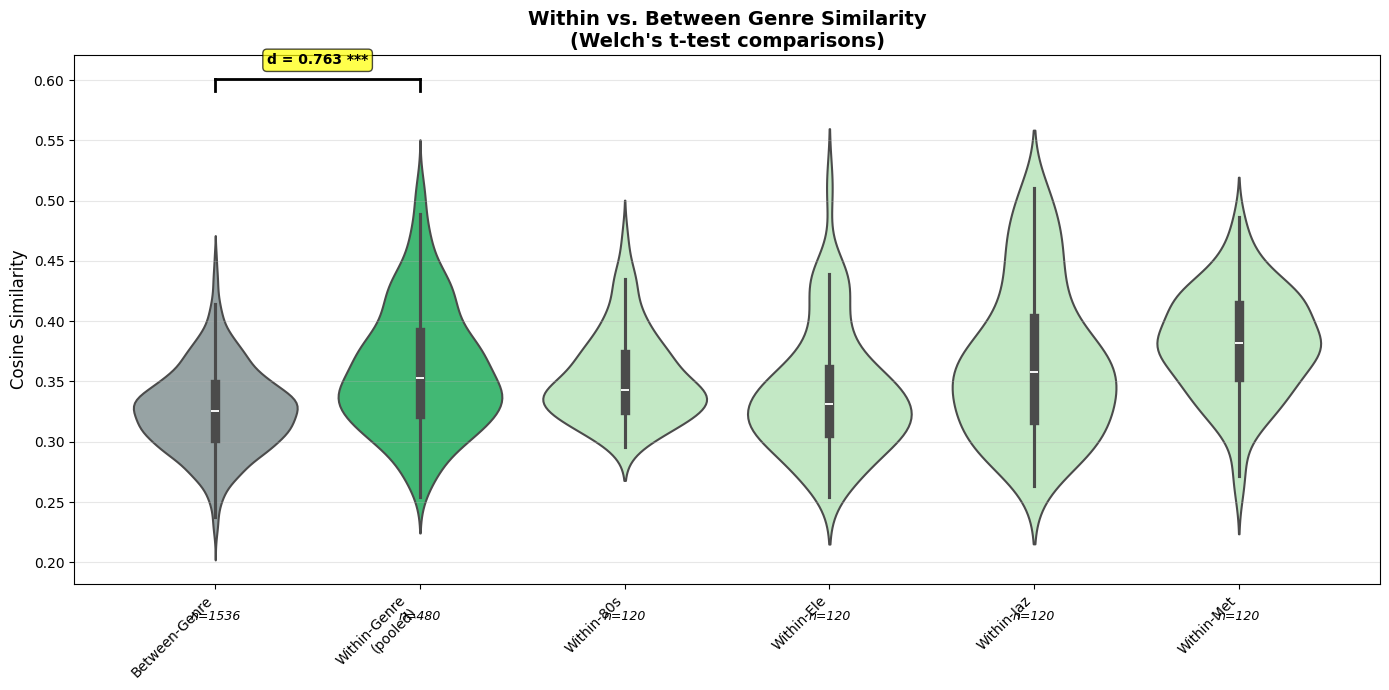

✓ Saved plot to: /content/context-framed-listening/NLP_outputs/TFIDF/TFIDF_genre_within_vs_between.png

--- CONTEXT ANALYSIS ---

WITHIN VS. BETWEEN CONTEXT SIMILARITY ANALYSIS

OVERALL COMPARISON:
  Within-Context: M=0.3405, SD=0.0400 (N=480)
  Between-Context: M=0.3326, SD=0.0426 (N=1536)
  Difference: 0.0079
  Welch's t(2014) = 3.716, p = 0.0002 ***
  Cohen's d = 0.191

INDIVIDUAL CONTEXT COMPARISONS:

BAR  vs Between:
  Within-bar : M=0.3543, SD=0.0352 (N=120)
  Between: M=0.3326, SD=0.0426 (N=1536)
  t = 6.358, p = 0.0000 ***, d = 0.553

CONCERT  vs Between:
  Within-concert : M=0.3486, SD=0.0412 (N=120)
  Between: M=0.3326, SD=0.0426 (N=1536)
  t = 4.083, p = 0.0001 ***, d = 0.382

MOVIE vs Between:
  Within-movie: M=0.3345, SD=0.0391 (N=120)
  Between: M=0.3326, SD=0.0426 (N=1536)
  t = 0.509, p = 0.6117 n.s., d = 0.046

VIDEO GAME vs Between:
  Within-video game: M=0.3246, SD=0.0373 (N=120)
  Between: M=0.3326, SD=0.0426 (N=1536)
  t = -2.232, p = 0.0272 *, d = -0.199

✓ Saved 

/content/analysis_utils.py:1137: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=plot_df, x='category', y='similarity',
/content/analysis_utils.py:1146: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(categories, rotation=45, ha='right', fontsize=10)


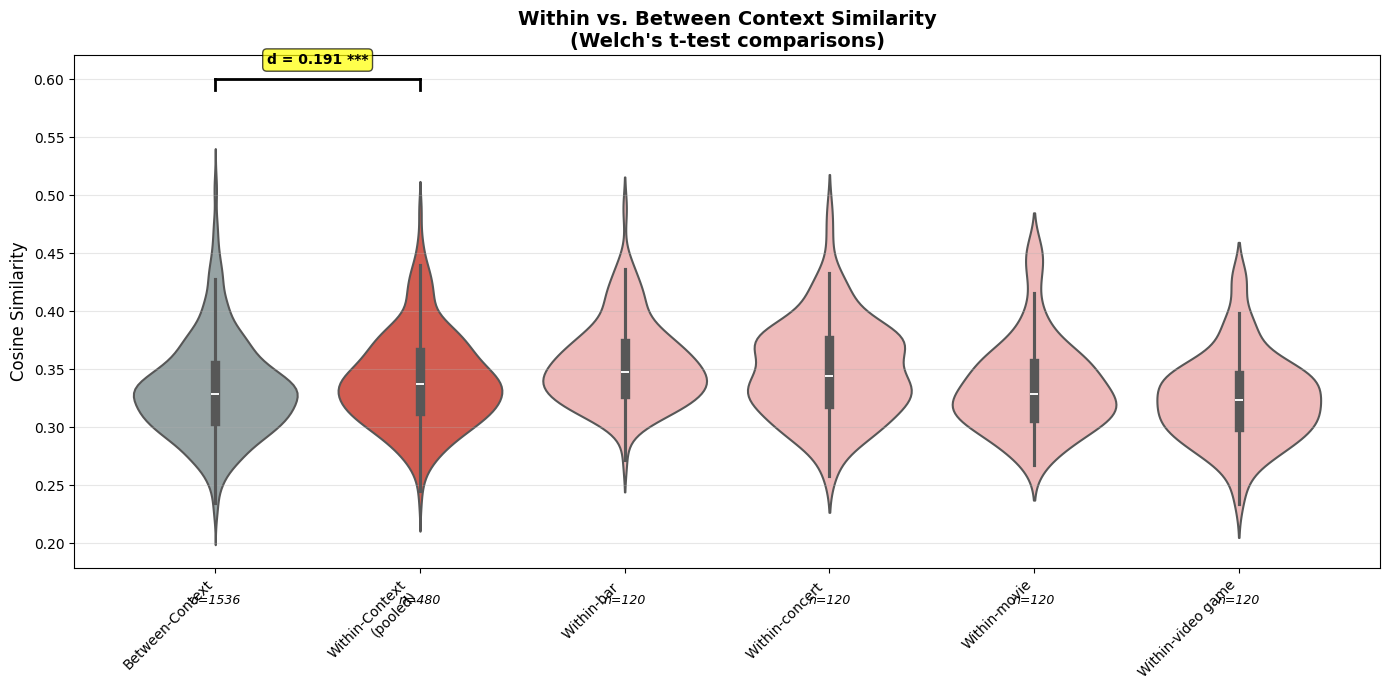

✓ Saved plot to: /content/context-framed-listening/NLP_outputs/TFIDF/TFIDF_context_within_vs_between.png

WITHIN VS. BETWEEN SUMMARY

GENRE:
  Within-Genre: M=0.3601
  Between-Genre: M=0.3265
  Effect size (d): 0.763 ***

CONTEXT:
  Within-Context: M=0.3405
  Between-Context: M=0.3326
  Effect size (d): 0.191 ***


In [11]:
print("\n" + "="*70)
print("WITHIN VS. BETWEEN FACTOR SIMILARITY")
print("="*70)

# Genre analysis
print("\n--- GENRE ANALYSIS ---")
genre_within_between_df, genre_within_between_fig = utils.analyze_within_vs_between_factor(
    sim_df=sim_df_docs,
    metadata=METdocs,
    factor_column='genre_code',
    factor_name='Genre',
    output_dir=OUTPUT_DIR,
    model_prefix='TFIDF',
    verbose=True
)

# Context analysis
print("\n--- CONTEXT ANALYSIS ---")
context_within_between_df, context_within_between_fig = utils.analyze_within_vs_between_factor(
    sim_df=sim_df_docs,
    metadata=METdocs,
    factor_column='context_word',
    factor_name='Context',
    output_dir=OUTPUT_DIR,
    model_prefix='TFIDF',
    verbose=True
)

# Print comparison summary
print("\n" + "="*70)
print("WITHIN VS. BETWEEN SUMMARY")
print("="*70)
print("\nGENRE:")
print(f"  Within-Genre: M={genre_within_between_df.iloc[0]['mean1']:.4f}")
print(f"  Between-Genre: M={genre_within_between_df.iloc[0]['mean2']:.4f}")
print(f"  Effect size (d): {genre_within_between_df.iloc[0]['d']:.3f} {genre_within_between_df.iloc[0]['sig']}")

print("\nCONTEXT:")
print(f"  Within-Context: M={context_within_between_df.iloc[0]['mean1']:.4f}")
print(f"  Between-Context: M={context_within_between_df.iloc[0]['mean2']:.4f}")
print(f"  Effect size (d): {context_within_between_df.iloc[0]['d']:.3f} {context_within_between_df.iloc[0]['sig']}")

### VISUALISATIONS


GENERATING ALL VISUALIZATIONS

GENERATING FACTOR-SPECIFIC VISUALIZATIONS

1. Generating within-factor comparison (Context vs. Genre)...


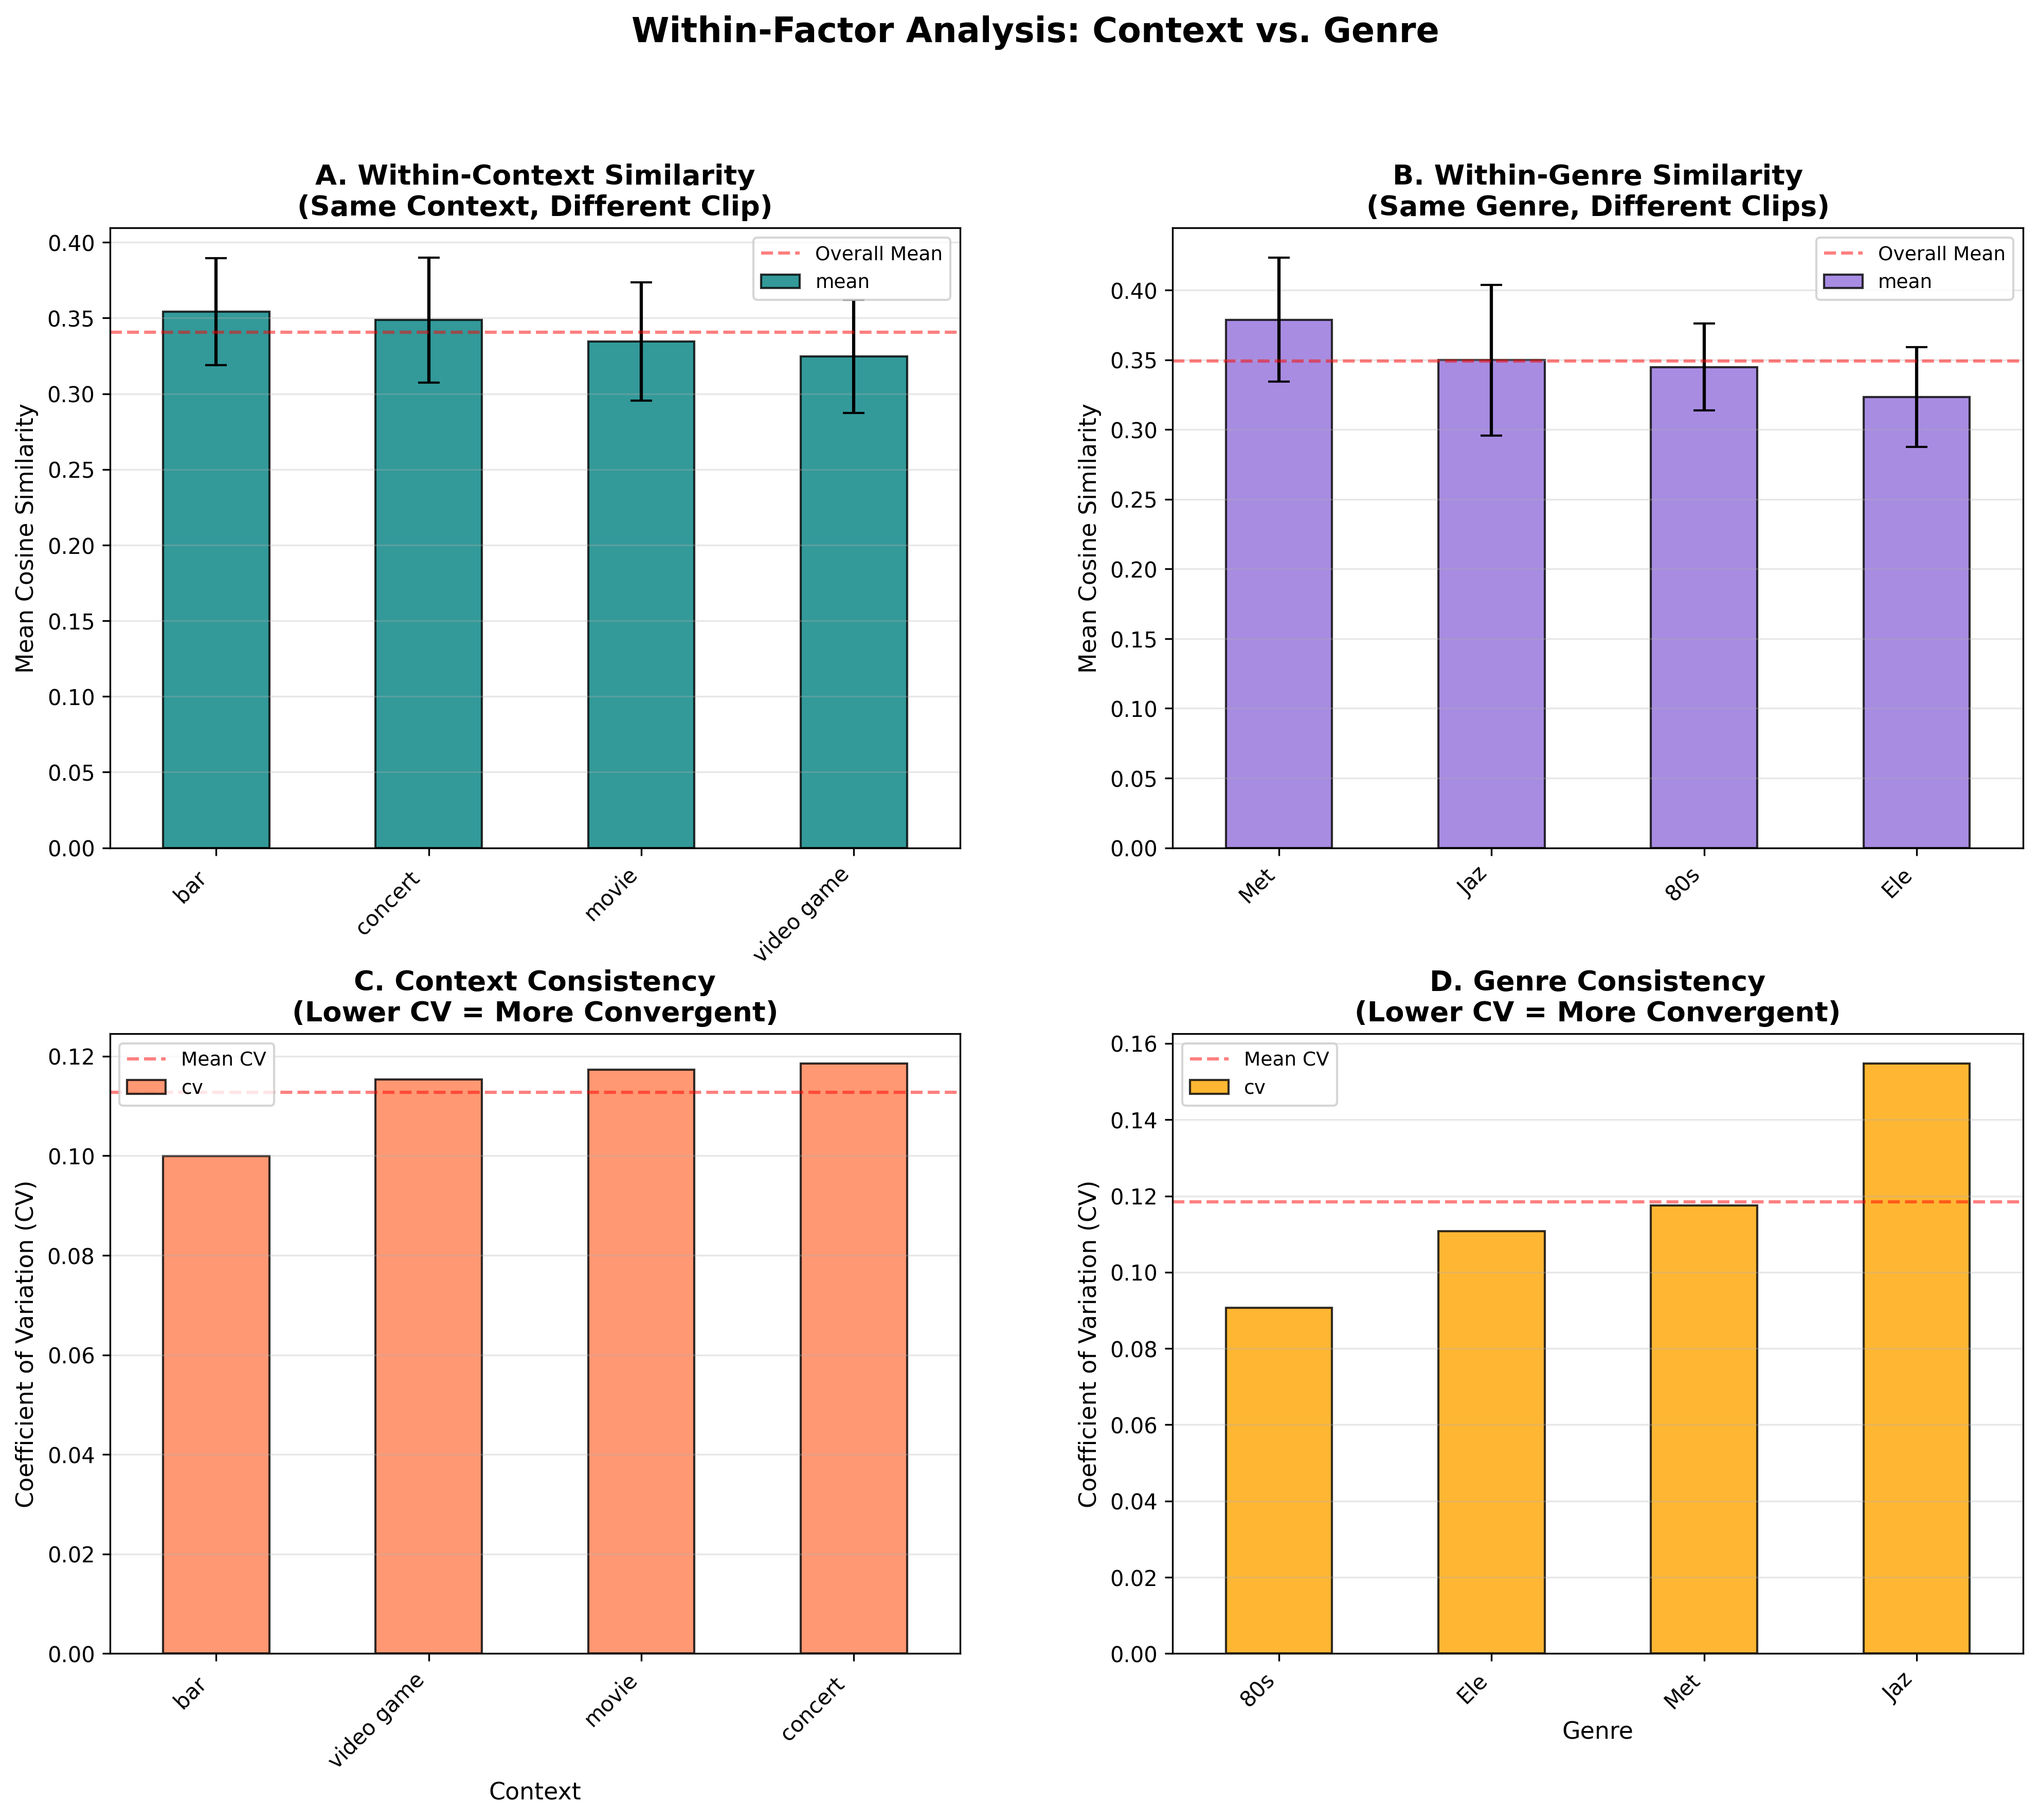


2. Generating pairwise comparison (Context vs. Genre)...


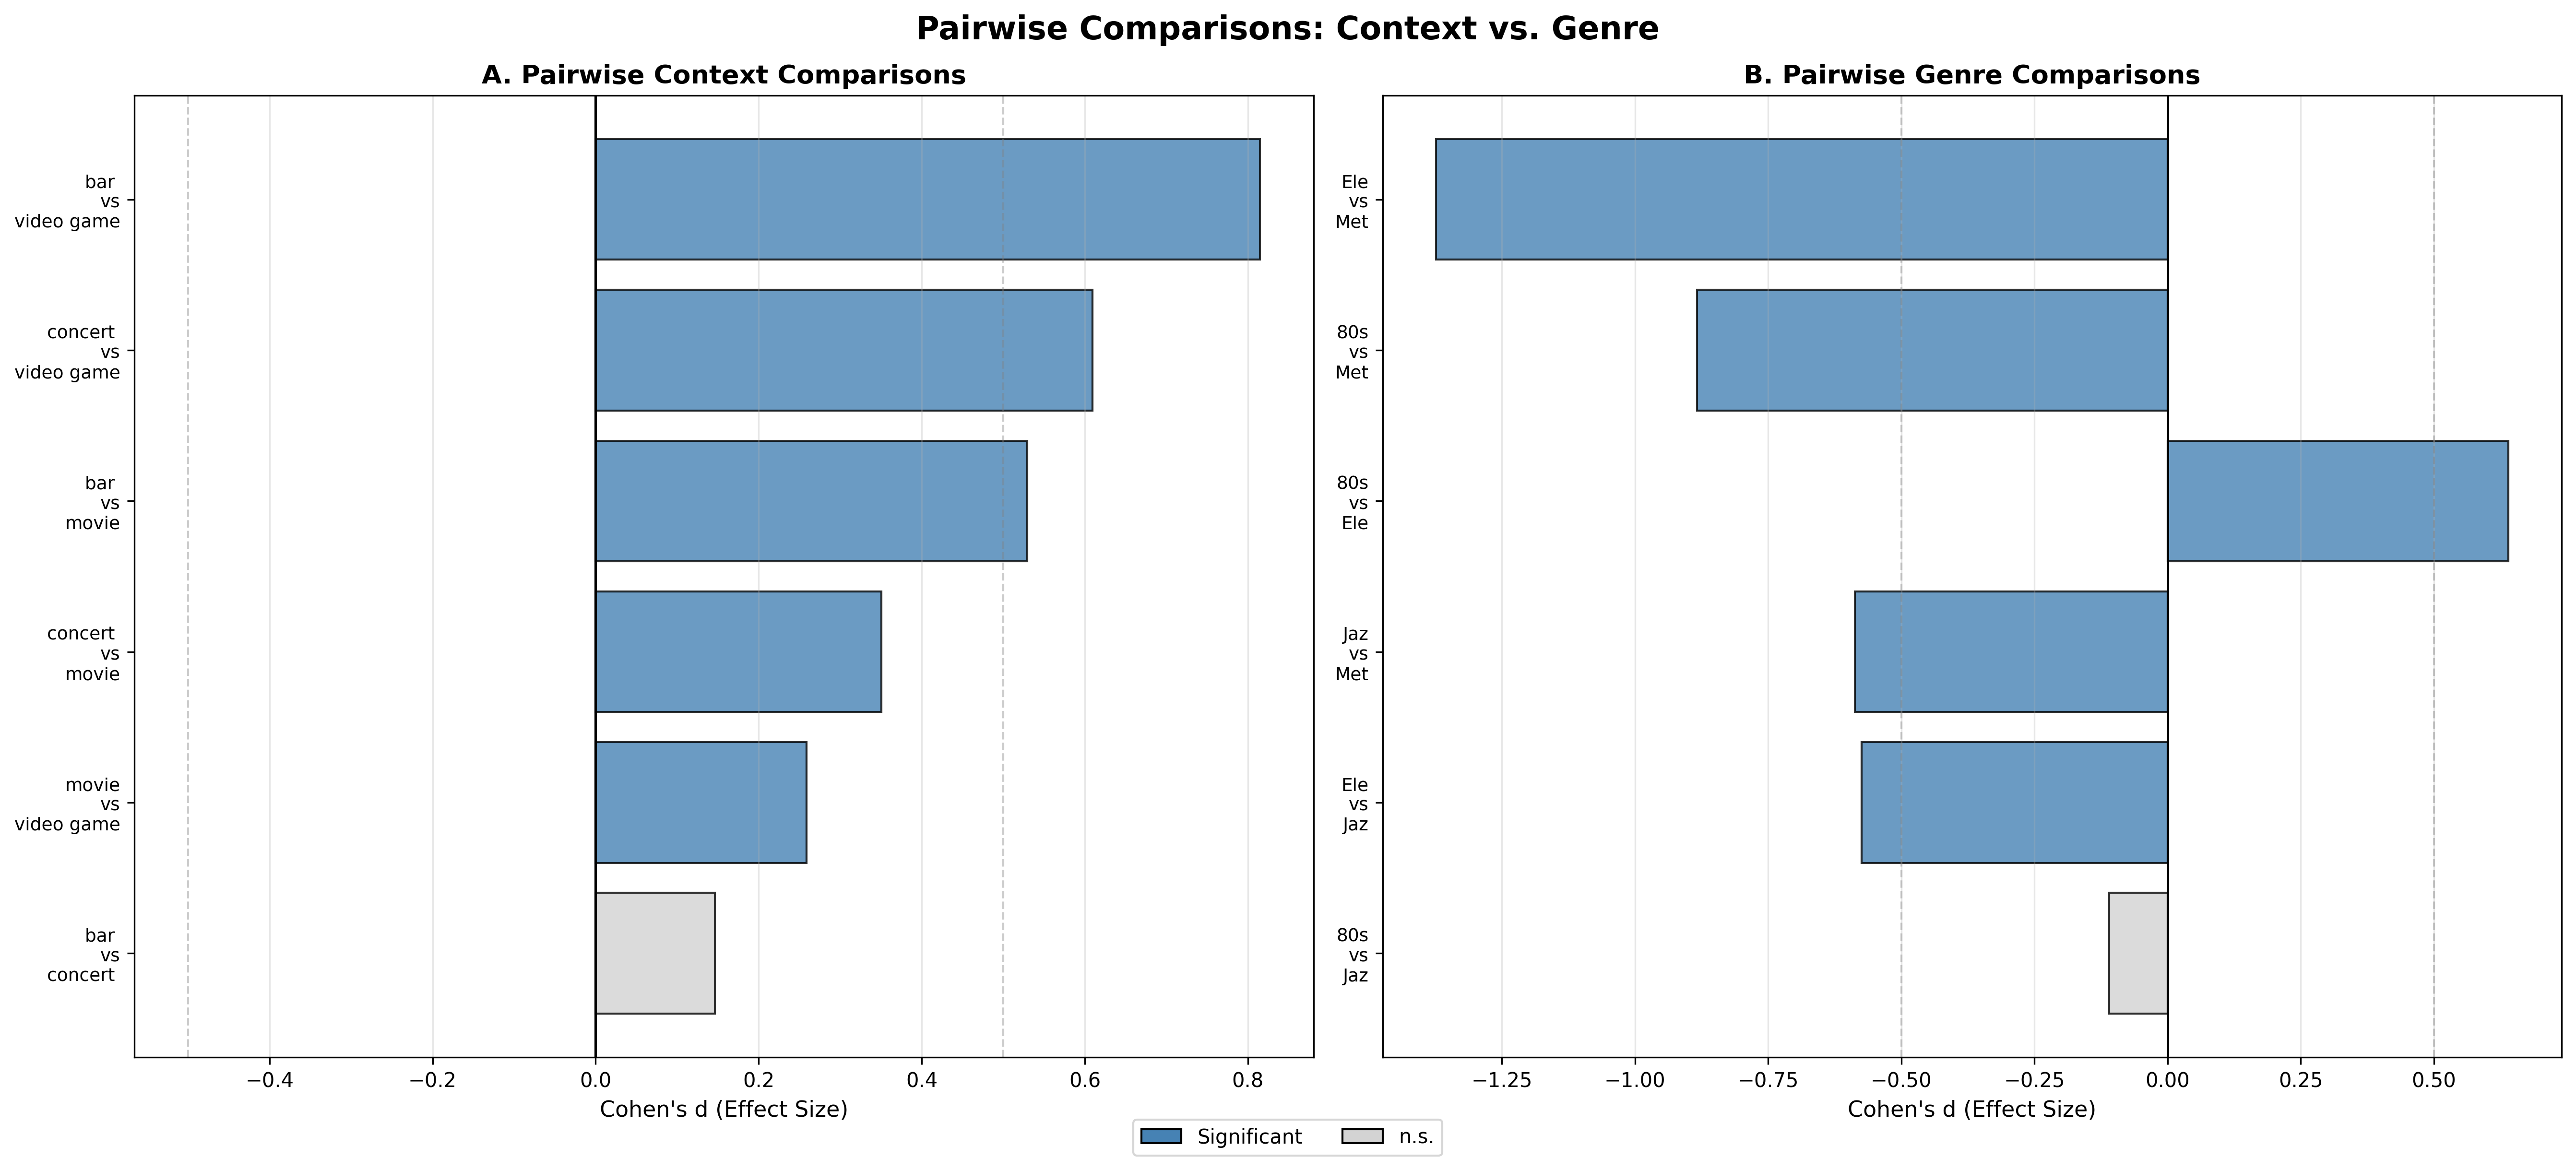


3. Generating clip vs. context comparison (Context vs. Genre)...


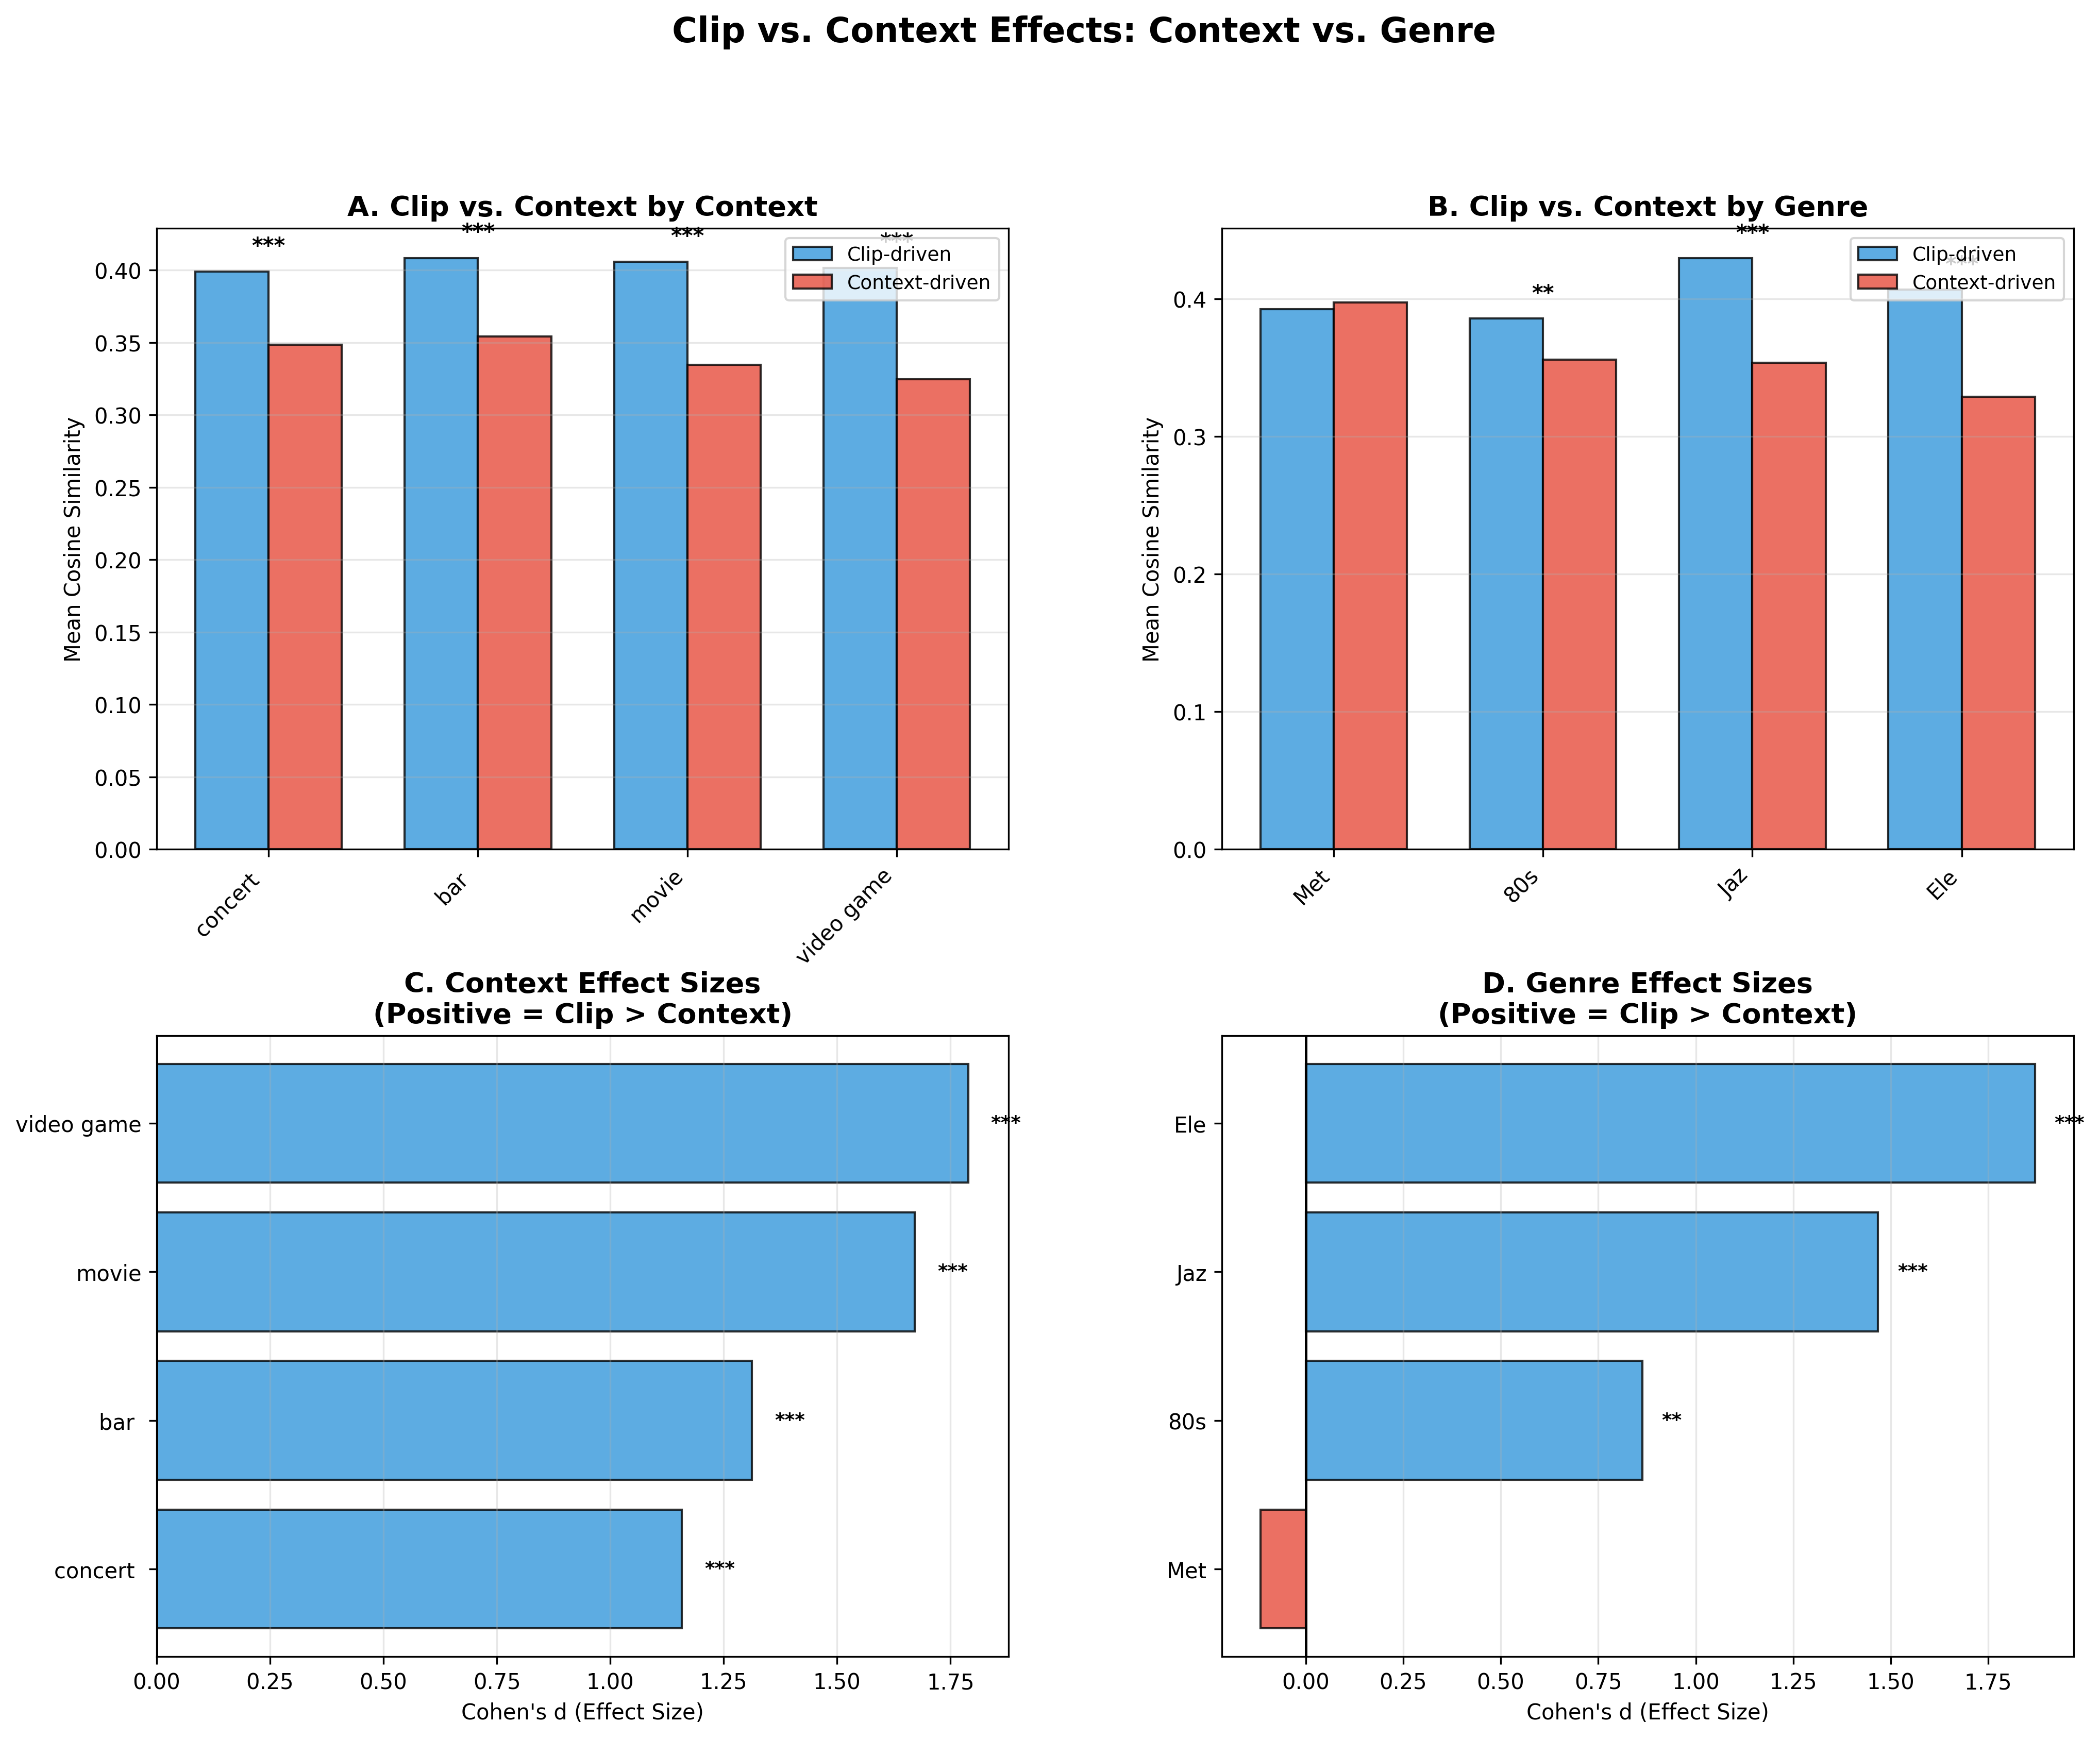


4. Generating consistency comparison (Context vs. Genre)...


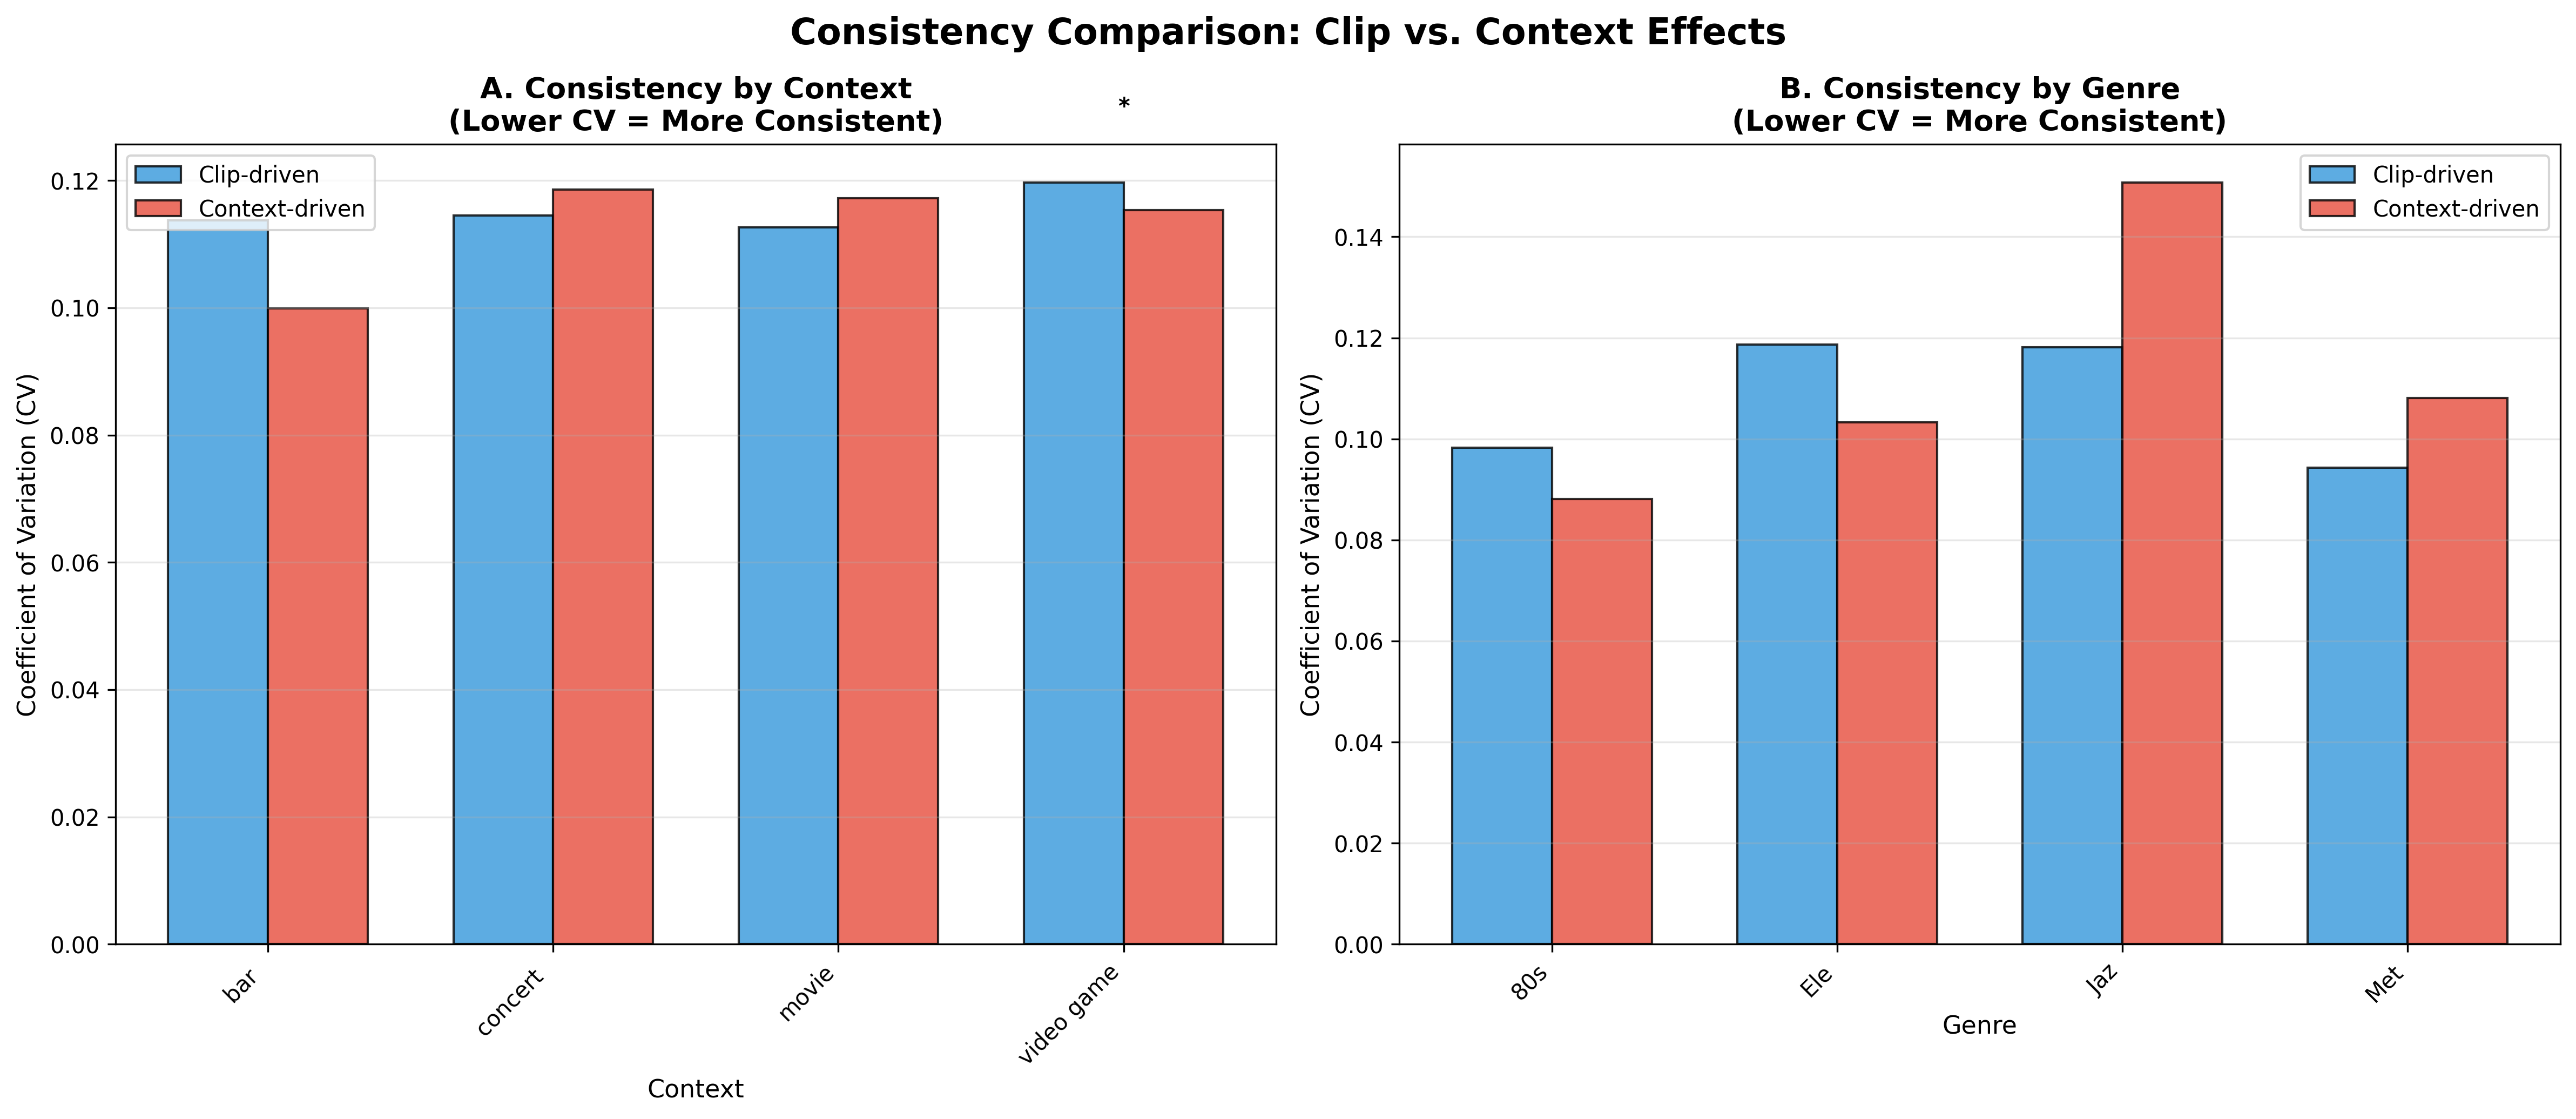


5. Generating similarity matrices (Context vs. Genre)...


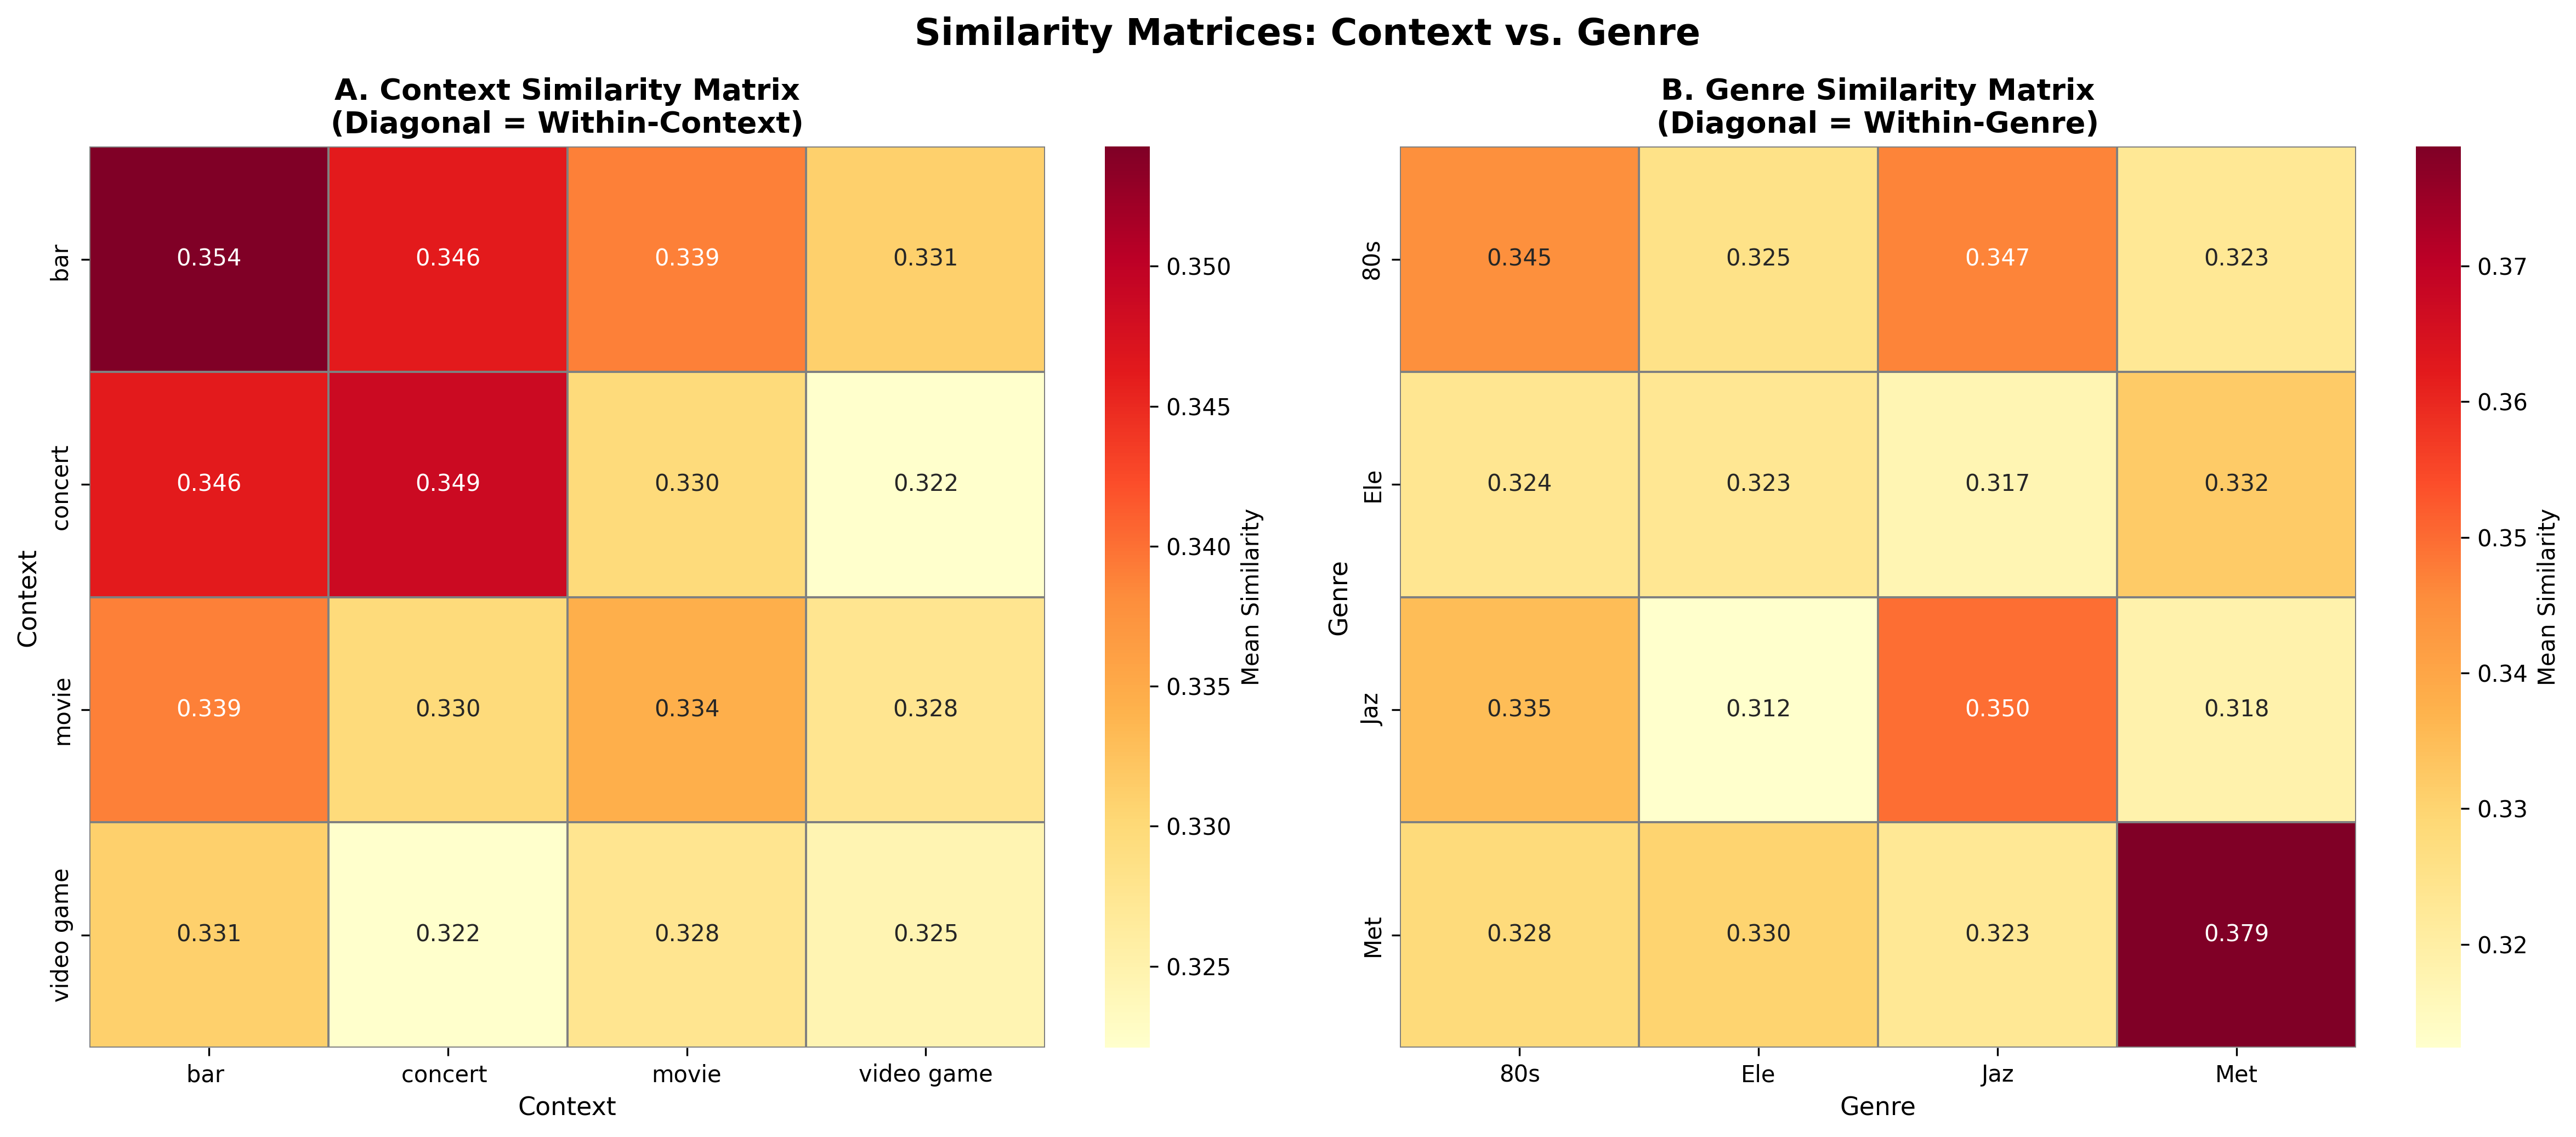


6. Generating Genre × Context interaction heatmap...


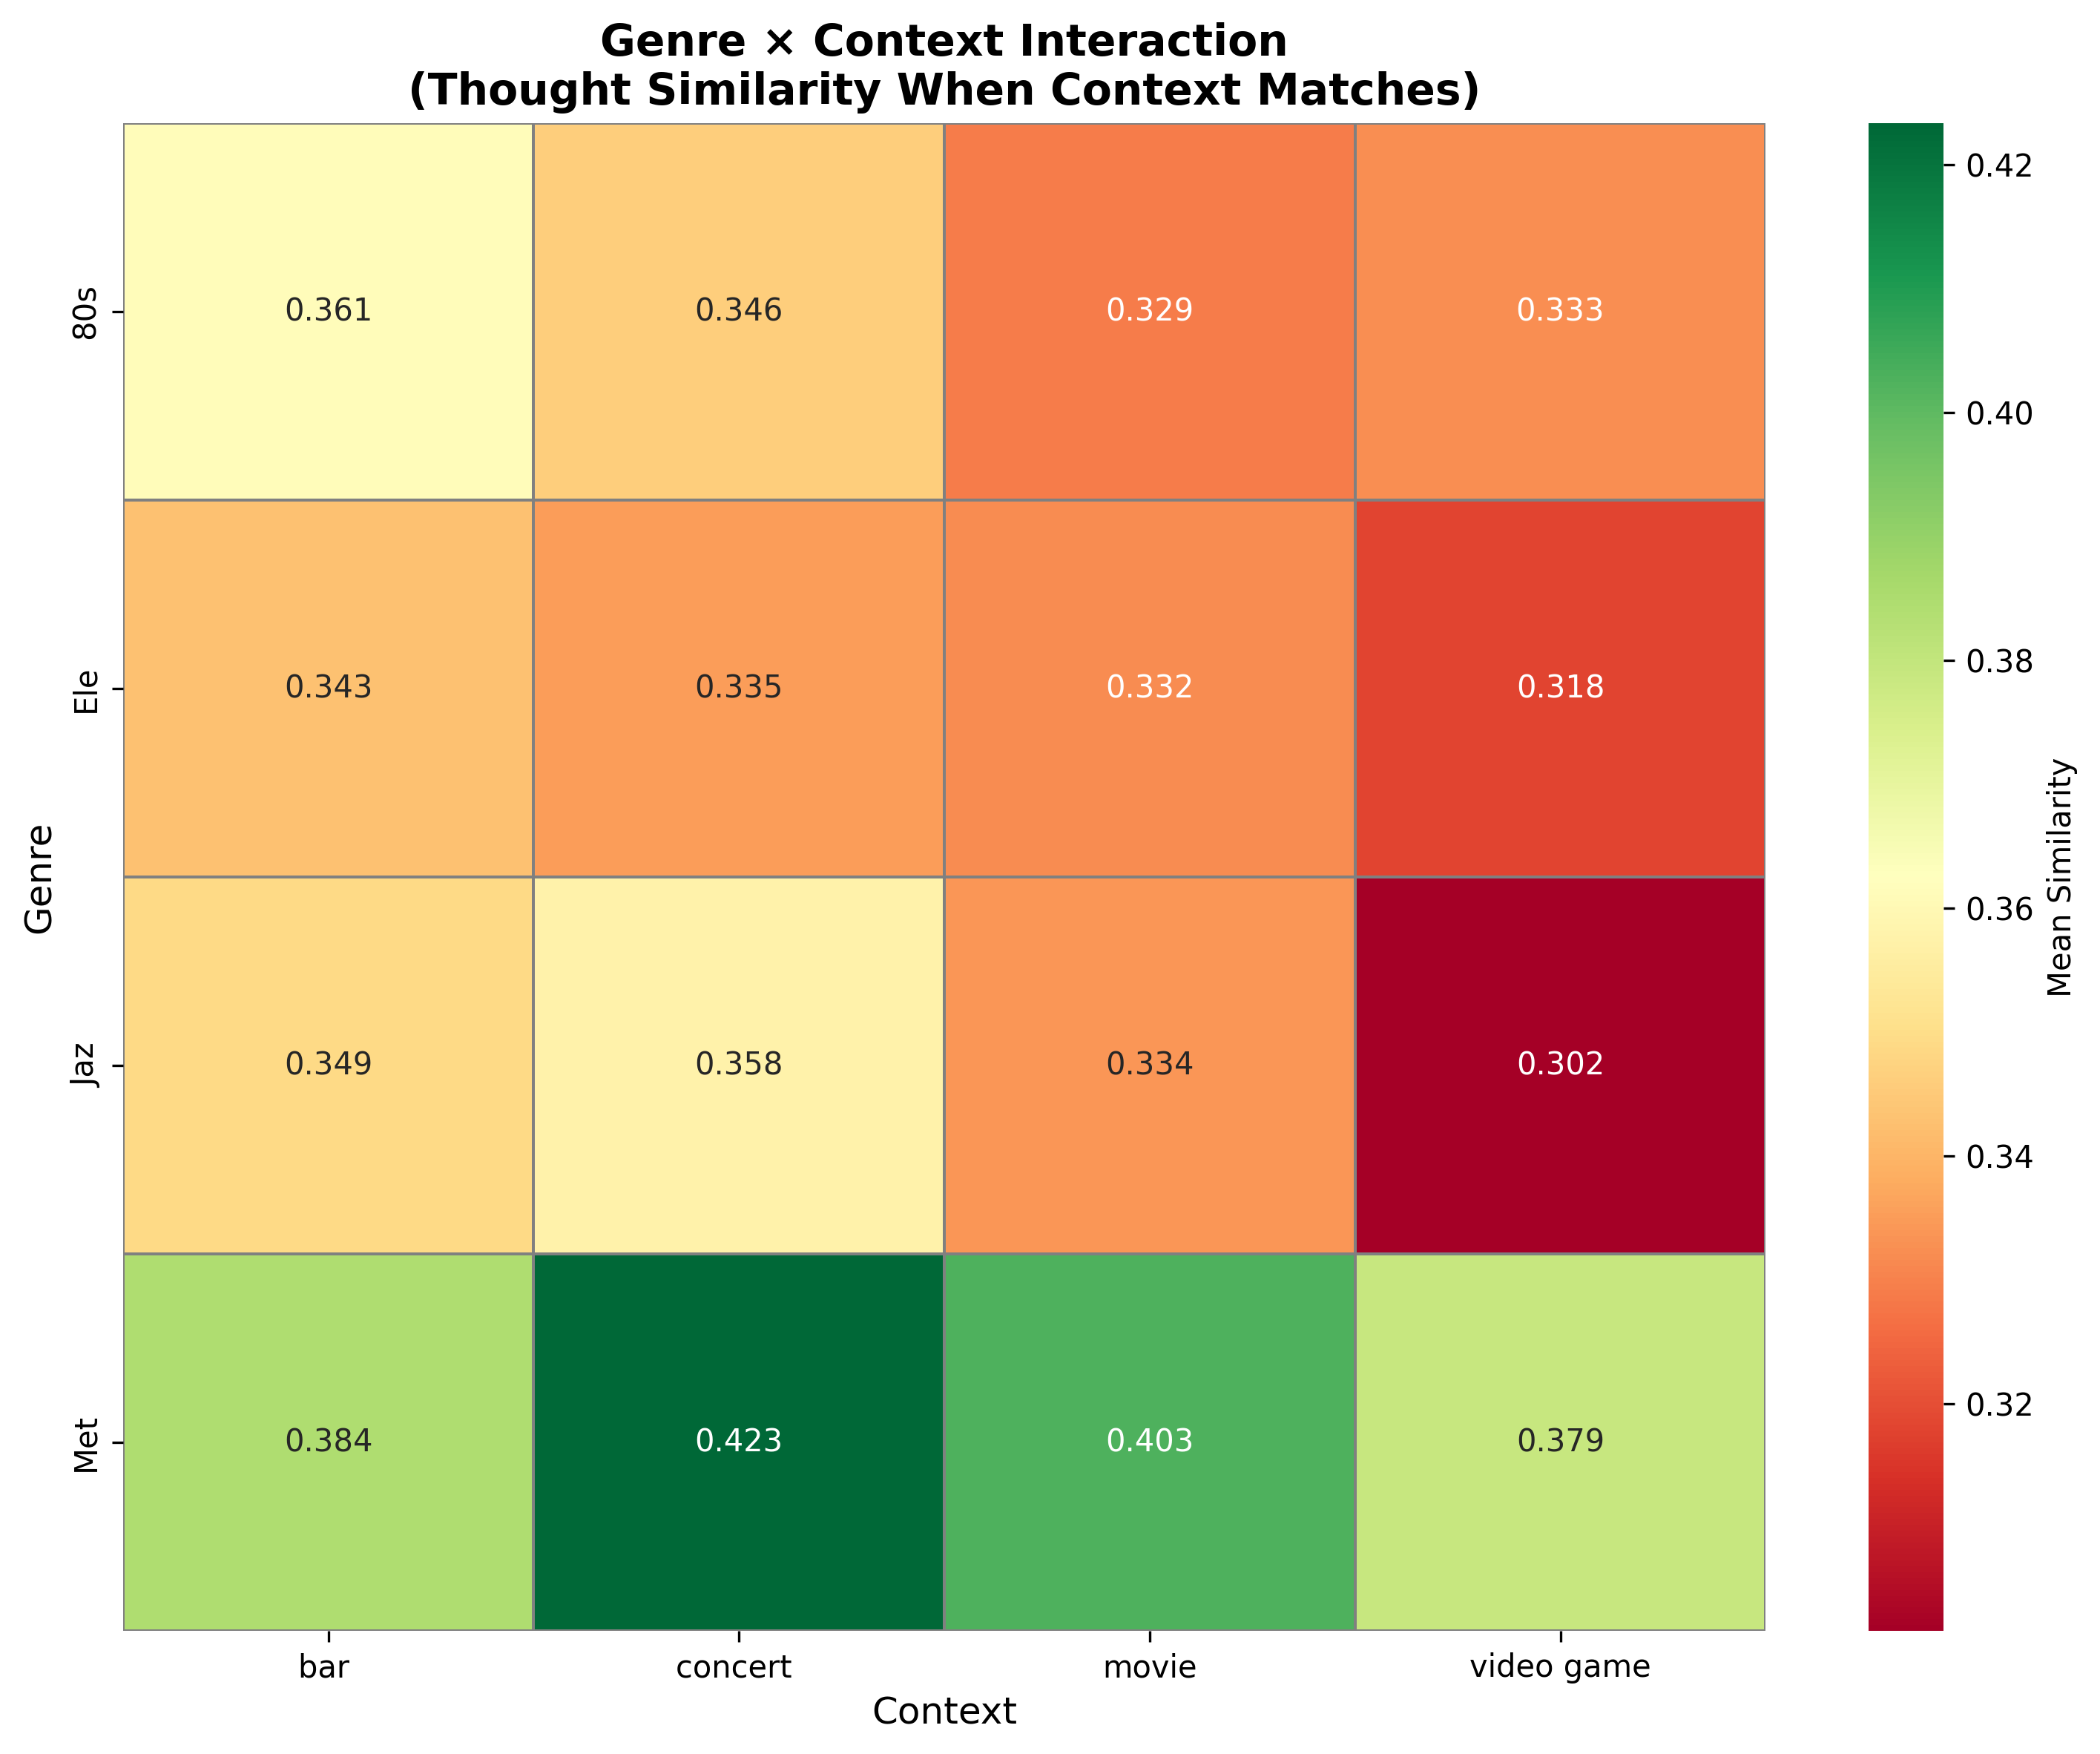


7. Generating primary comparison bar chart...


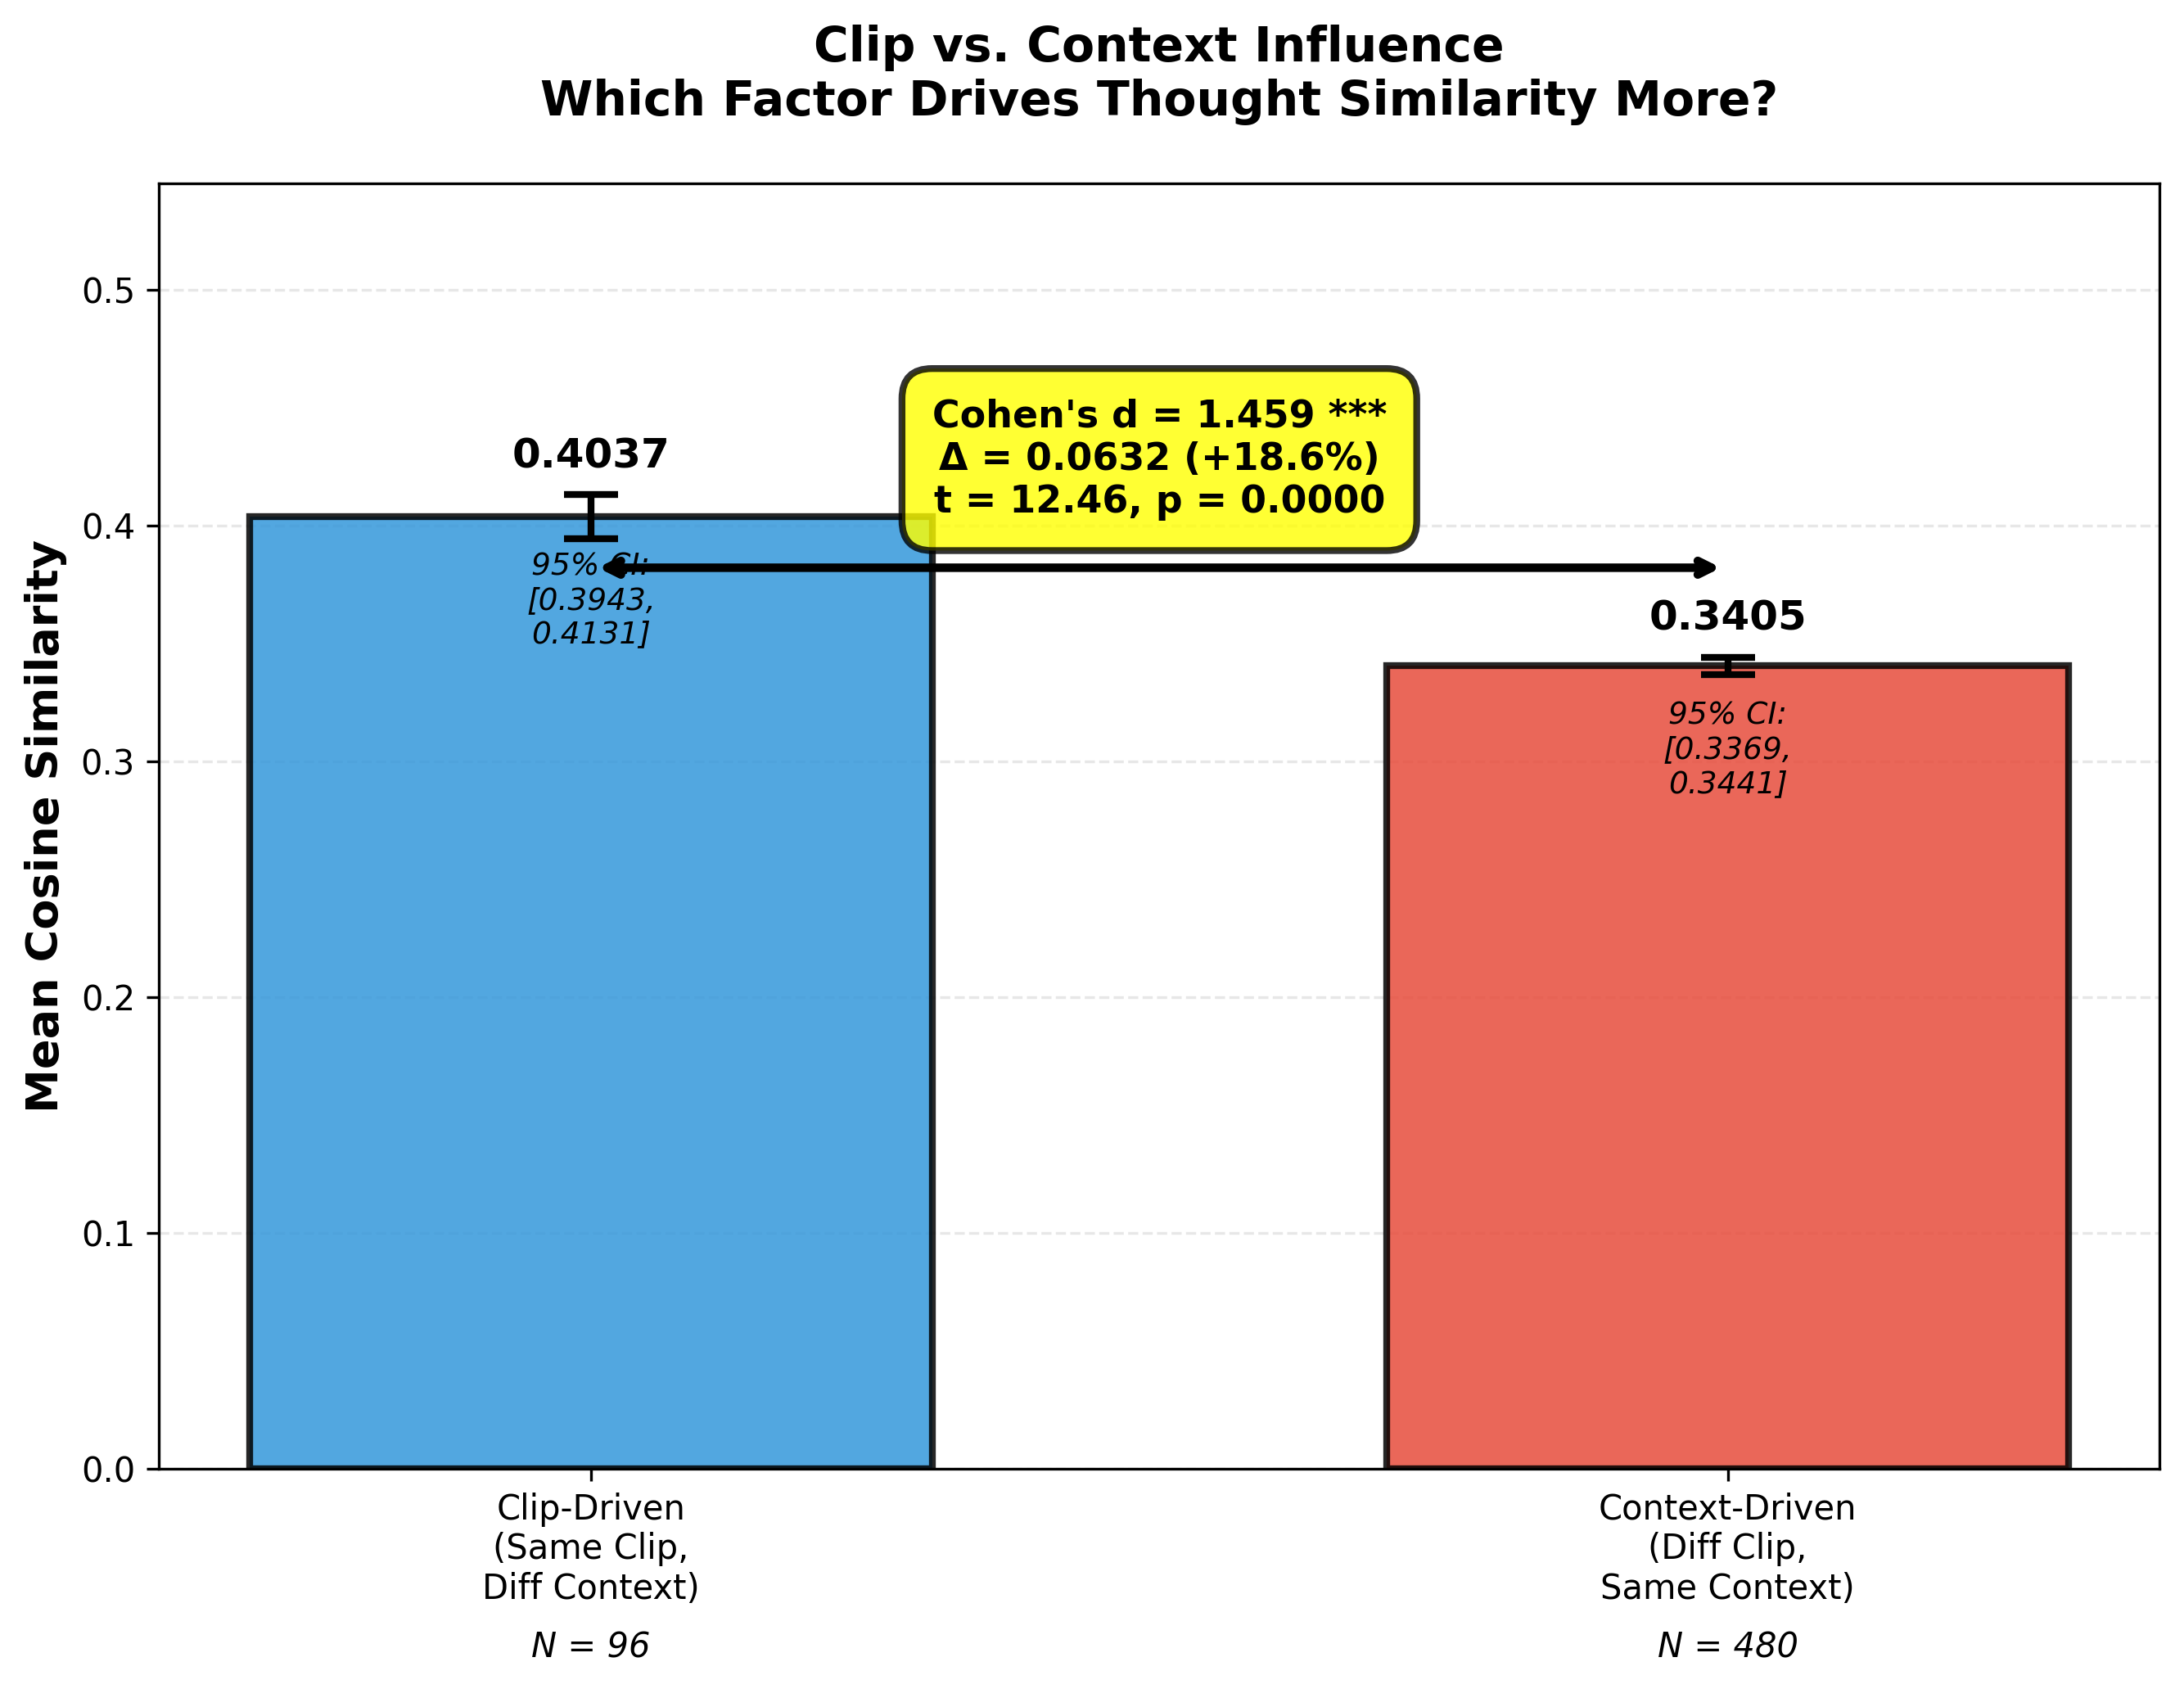


8. Generating comprehensive conditions figure...


/content/analysis_utils.py:2476: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_c.set_xticklabels(labels_all, rotation=0, ha='center', fontsize=10)


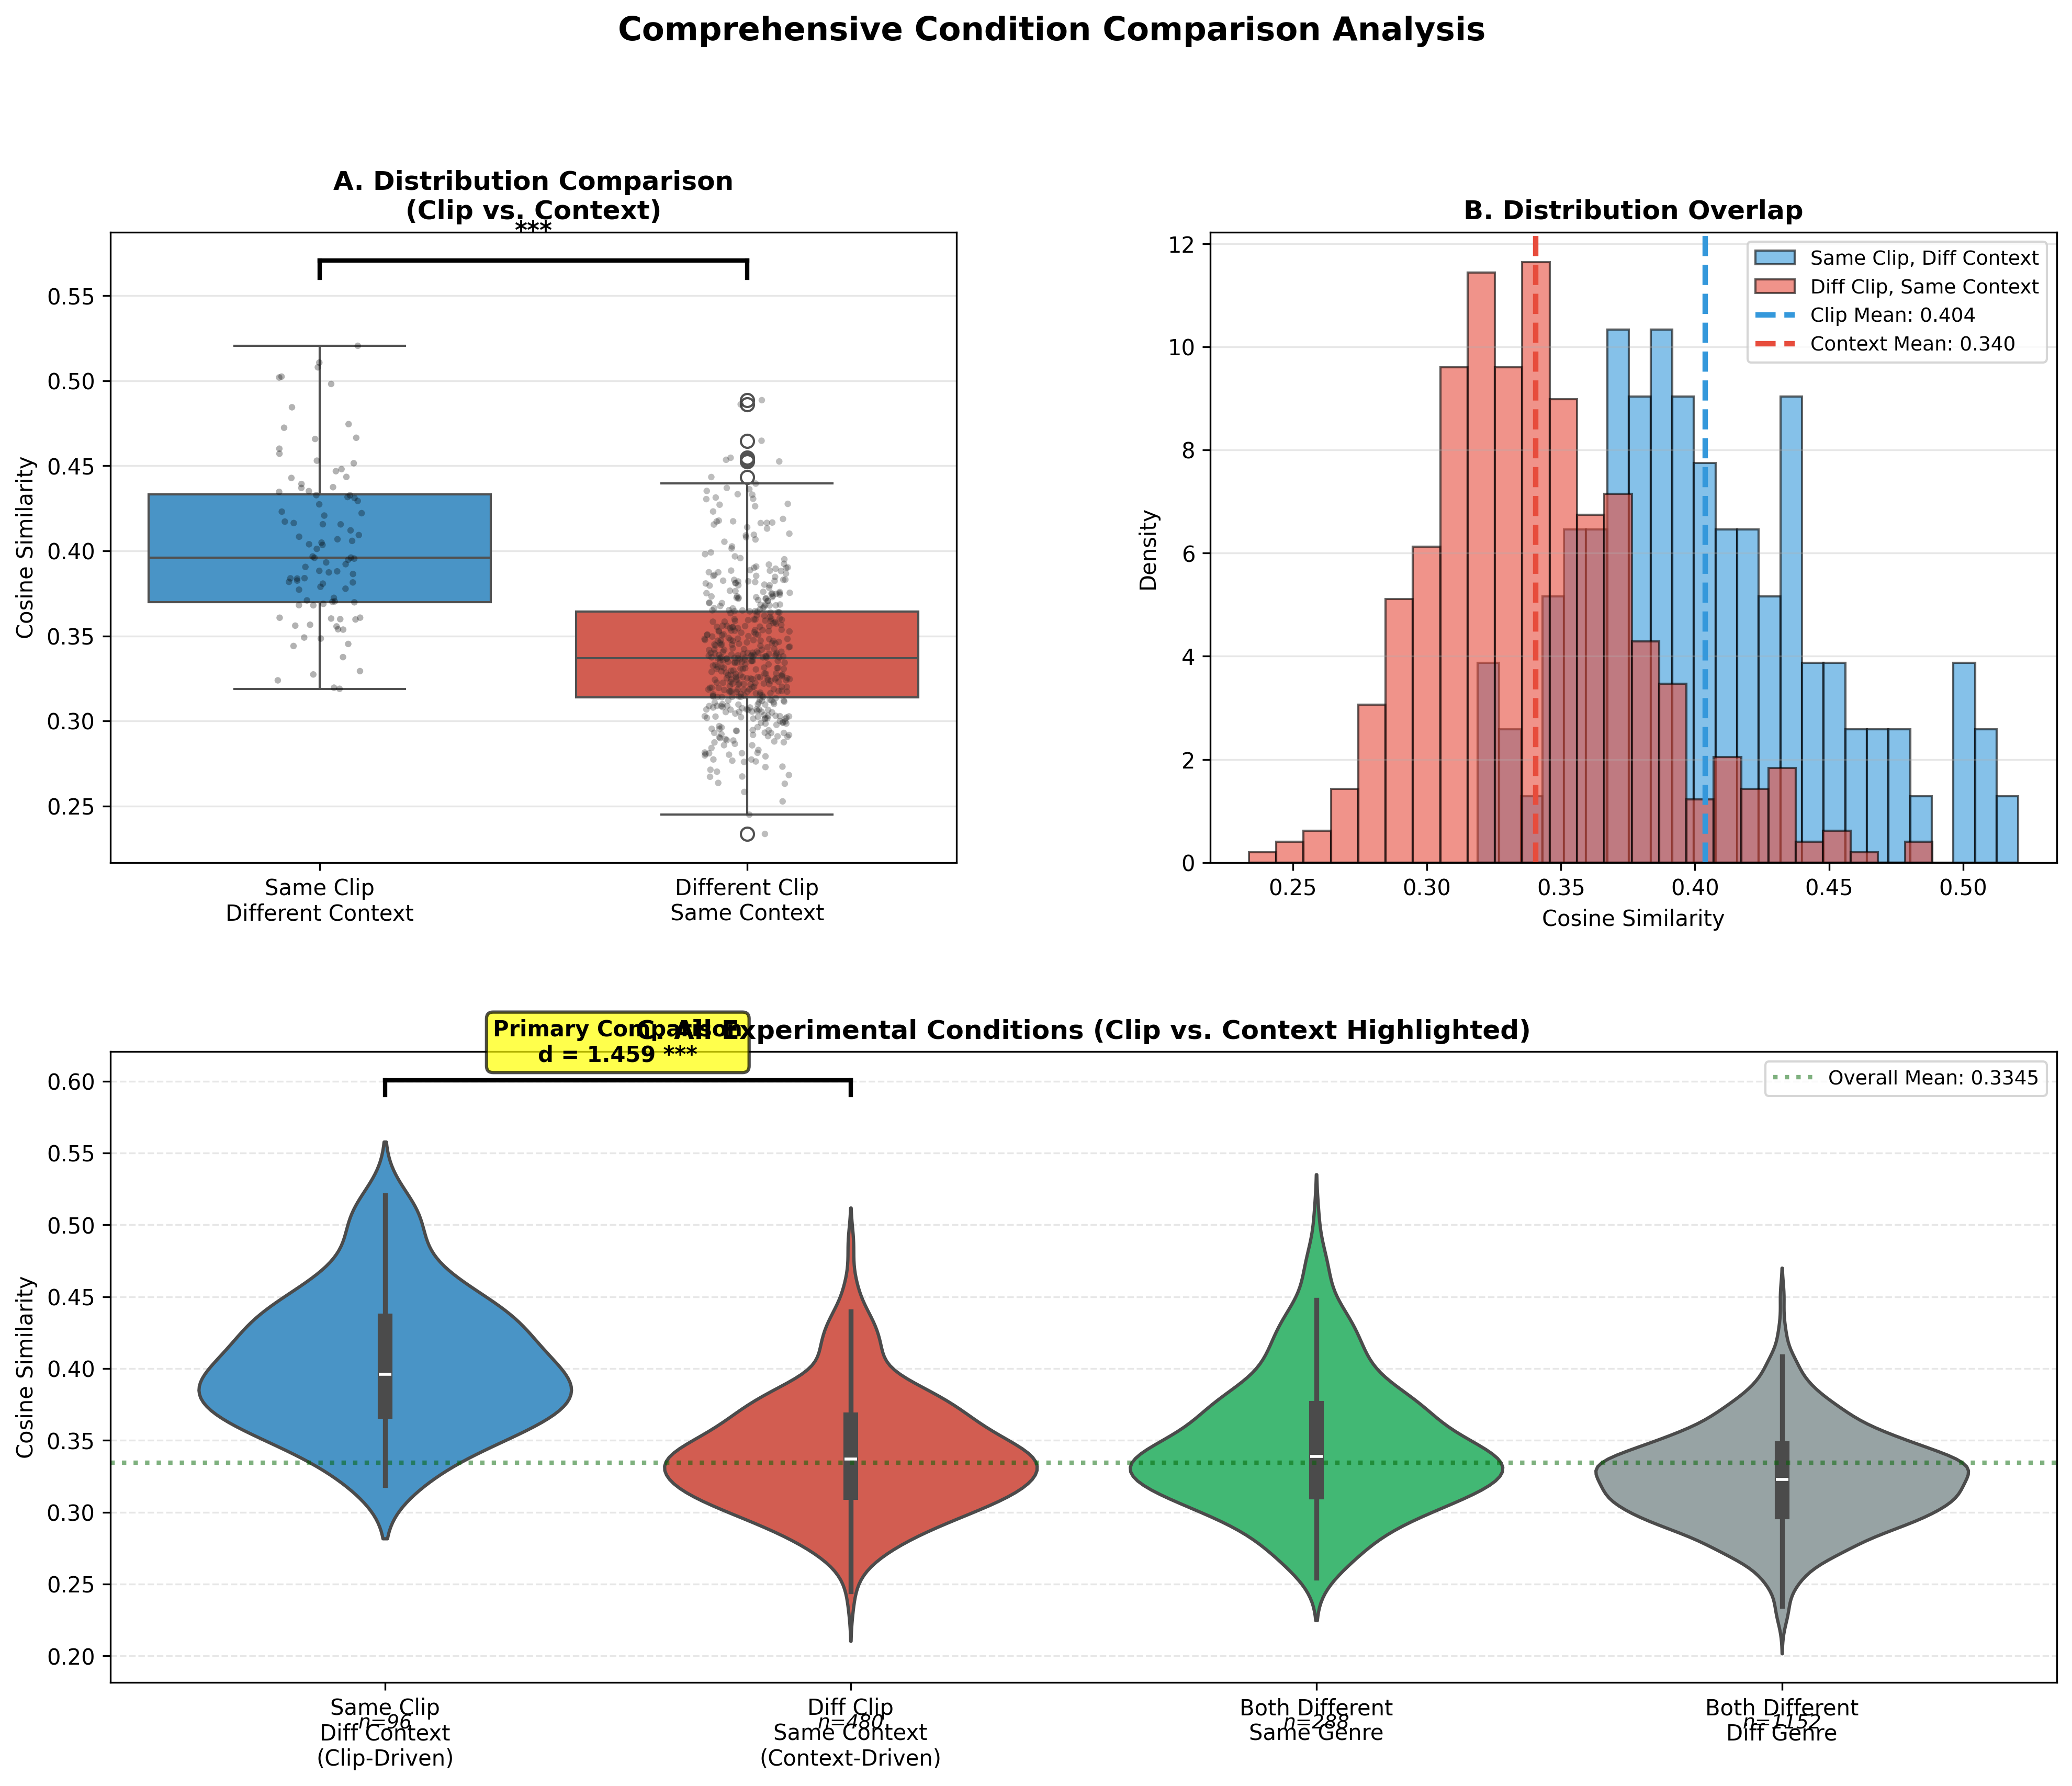


FACTOR-SPECIFIC VISUALIZATION SUMMARY
Generated 8 comprehensive figures (saved and displayed inline if in a notebook).


In [12]:
print("\n" + "="*70)
print("GENERATING ALL VISUALIZATIONS")
print("="*70)

utils.generate_all_visualizations(
    context_within_df=within_context_df,
    genre_within_df=within_genre_df,
    context_pairs_df=context_pairs_df,
    genre_pairs_df=genre_pairs_df,
    context_moderator_df=context_moderator_df,
    genre_moderator_df=genre_moderator_df,
    context_consistency_df=context_consistency_df,
    genre_consistency_df=genre_consistency_df,
    context_consistency_comp_df=context_consistency_comp_df,
    genre_consistency_comp_df=genre_consistency_comp_df,
    genre_context_df=genre_context_df,
    sim_df=sim_df_docs,
    metadata=METdocs,
    primary_comparison=primary_comparison,
    output_dir=OUTPUT_DIR,
    model_prefix='TFIDF',
    verbose=True
)

### t-SNE Dimensionality Reduction


t-SNE ANALYSIS

t-SNE ANALYSIS (TFIDF)
Filtered 1 ignored word(s) from TF-IDF scores: ['endofasubhere']
Converted sparse matrix to dense
Document embedding shape: (64, 3295)

Running TruncatedSVD -> 50 components (original dim=3295)
TruncatedSVD explained variance ratio: 0.849

Running t-SNE on document vectors...
  Perplexity: 30
  Iterations: 1000


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(



✓ Saved document t-SNE coordinates to: /content/context-framed-listening/NLP_outputs/TFIDF/TFIDF_tsne_coords.csv


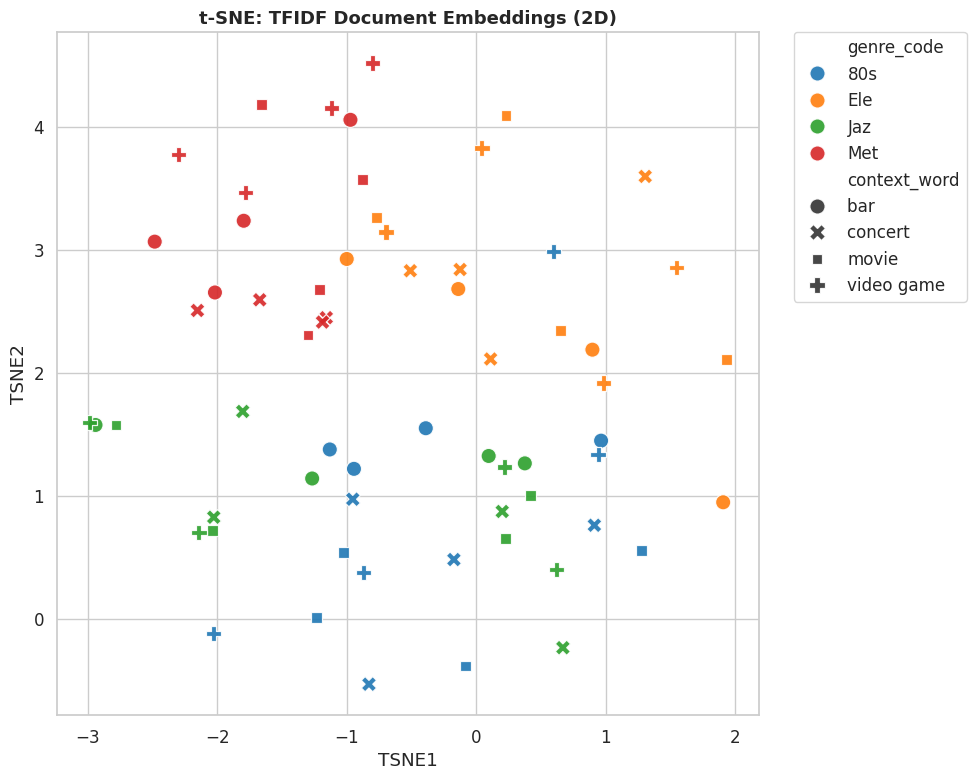

✓ Saved document t-SNE plot to: /content/context-framed-listening/NLP_outputs/TFIDF/TFIDF_tsne_plot.png

Running word-level t-SNE on top 500 terms...
Selected 500 terms by mean TF-IDF


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


✓ Saved word t-SNE coords to: /content/context-framed-listening/NLP_outputs/TFIDF/TFIDF_word_tsne_top500.csv


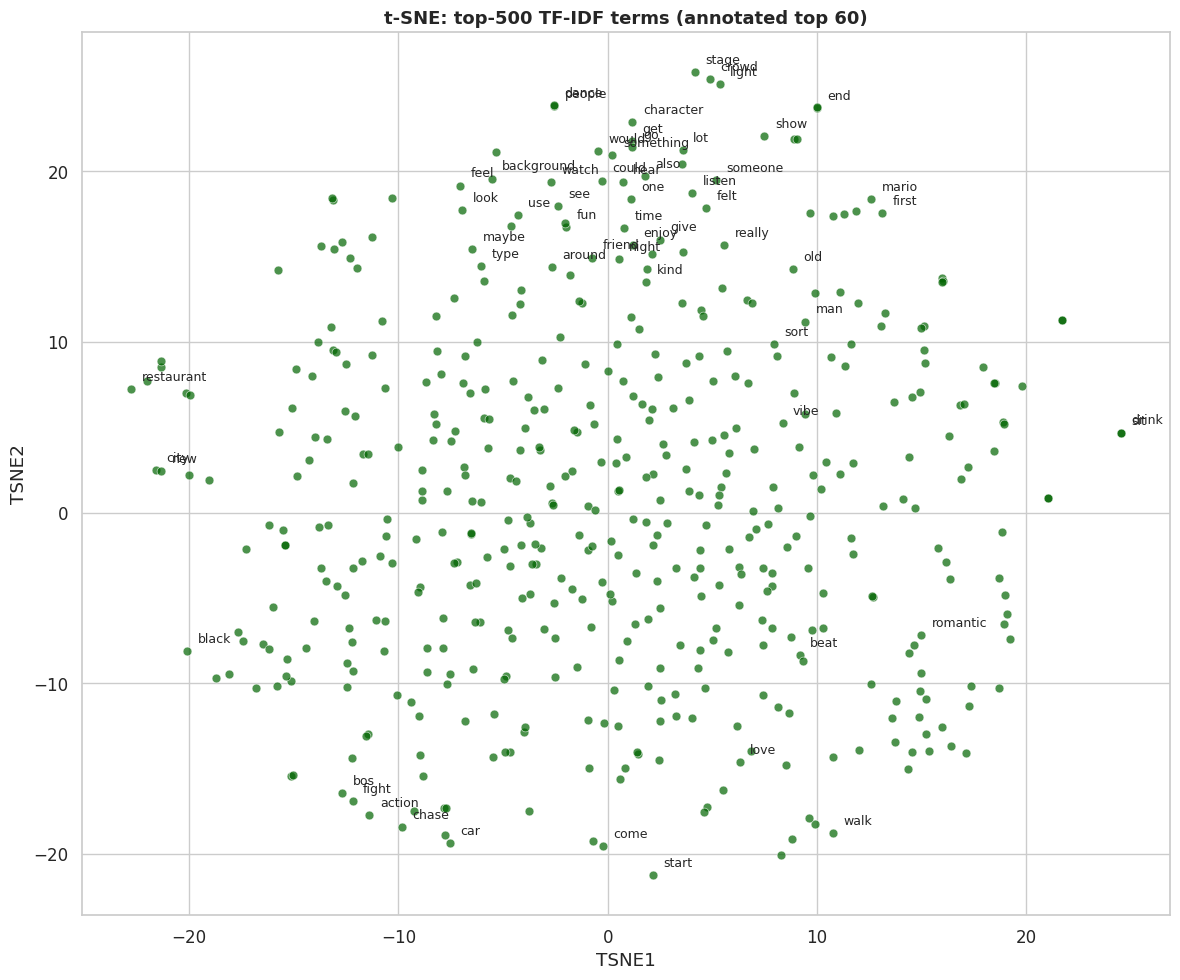

✓ Saved word t-SNE plot to: /content/context-framed-listening/NLP_outputs/TFIDF/TFIDF_word_tsne_top500.png

✓ t-SNE analysis complete


In [13]:
print("\n" + "="*70)
print("t-SNE ANALYSIS")
print("="*70)

# Run t-SNE on documents and words
doc_tsne_df, word_tsne_df = utils.run_tsne_analysis(
    embedding_matrix=tfidf_matrix_docs,
    metadata=METdocs,
    output_dir=OUTPUT_DIR,
    model_prefix='TFIDF',
    svd_components=50,
    tsne_perplexity=30,
    tsne_n_iter=1000,
    tsne_random_state=42,
    do_word_tsne=True,
    tfidf_scores_df=df_TFIDF_docs,
    top_n_words=500,
    verbose=True
)

### SUMMARY

In [14]:
print("\n\n" + "="*70)
print("ANALYSIS COMPLETE")
print("="*70)
print(f"\nAll analyses completed and saved to: {OUTPUT_DIR}/")
print("\nGenerated files:")
print("  ✓ TF-IDF scores and cosine matrix")
print("  ✓ Similarity by condition")
print("  ✓ Binary comparisons (clip, context, genre)")
print("  ✓ Context-specific analyses (5 CSV files)")
print("  ✓ Genre-specific analyses (5 CSV files)")
print("  ✓ Genre × Context interaction")
print("  ✓ Within vs. Between factor analyses (2 CSV files)")
print("  ✓ All visualizations (13 figures)")
print("  ✓ t-SNE analysis (documents + words)")

print("\n" + "="*70)
print("COMPREHENSIVE OUTPUT SUMMARY")
print("="*70)
print("\nCSV Files: 15")
print("Visualization Figures: 13")
print("  1. Cosine similarity heatmap")
print("  2. Binary comparisons (3-panel)")
print("  3. Within-factor comparison (2×2)")
print("  4. Pairwise comparison (1×2)")
print("  5. Music vs. context comparison (2×2)")
print("  6. Consistency comparison (1×2)")
print("  7. Similarity matrices (1×2)")
print("  8. Genre × Context interaction")
print("  9. Primary comparison bar chart")
print(" 10. Comprehensive conditions (3-panel)")
print(" 11. Document t-SNE plot")
print(" 12. Word t-SNE plot")
print(" 13. Genre × Context word clouds (4×4 grid)")
print(" 14. Genre: Within vs. Between (6-panel violin)")
print(" 15. Context: Within vs. Between (6-panel violin)")
print("="*70)

print("\n✓ All done! Check the output directory for results.")



ANALYSIS COMPLETE

All analyses completed and saved to: /content/context-framed-listening/NLP_outputs/TFIDF/

Generated files:
  ✓ TF-IDF scores and cosine matrix
  ✓ Similarity by condition
  ✓ Binary comparisons (clip, context, genre)
  ✓ Context-specific analyses (5 CSV files)
  ✓ Genre-specific analyses (5 CSV files)
  ✓ Genre × Context interaction
  ✓ Within vs. Between factor analyses (2 CSV files)
  ✓ All visualizations (13 figures)
  ✓ t-SNE analysis (documents + words)

COMPREHENSIVE OUTPUT SUMMARY

CSV Files: 15
Visualization Figures: 13
  1. Cosine similarity heatmap
  2. Binary comparisons (3-panel)
  3. Within-factor comparison (2×2)
  4. Pairwise comparison (1×2)
  5. Music vs. context comparison (2×2)
  6. Consistency comparison (1×2)
  7. Similarity matrices (1×2)
  8. Genre × Context interaction
  9. Primary comparison bar chart
 10. Comprehensive conditions (3-panel)
 11. Document t-SNE plot
 12. Word t-SNE plot
 13. Genre × Context word clouds (4×4 grid)
 14. Genre